In [1]:
#importing all necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline 
import math
import itertools
import category_encoders as ce

#importing stats packages/modules
import scipy.stats as stats
from scipy.stats import binom,poisson,zscore,shapiro,norm,randint

#importing machine learning packages
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, OrdinalEncoder,LabelEncoder
from statsmodels.tools.eval_measures import mse, rmse 
from sklearn import metrics
from sklearn.metrics import r2_score,classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

# RF Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from mlxtend.plotting import plot_decision_regions

#supressing warnings
import warnings
warnings.filterwarnings('ignore')

# <u> Project Objective <u/> 
## investigate and analyse the leading contributors to population growth in Ireland and identify appropriate machine learning algorithms to forecast future populations.

# Section 1 - Exploratory Data Analysis

## 1.1 Population dataset

### 1.1.1 Population - Data Understanding

In [2]:
#source: CSO Home/Population Estimates/Annual Population Estimates/PEA01 - Population Estimates (Persons in April)
population = pd.read_csv('PEA01.20231009T101000.csv')

In [4]:
population.head()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN


In [5]:
population.shape

(5994, 6)

In [6]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  5994 non-null   object 
 1   Year             5994 non-null   int64  
 2   Age Group        5994 non-null   object 
 3   Sex              5994 non-null   object 
 4   UNIT             5994 non-null   object 
 5   VALUE            5880 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 281.1+ KB


In [19]:
#looking at the descriptive statistics
population.describe(include='all')

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
count,5994,5994.000000,5994,5994,5994,5880.000000
unique,1,NaN,27,3,1,NaN
top,Population Estimates (Persons in April),NaN,Under 1 year,Both sexes,Thousand,NaN
freq,5994,NaN,222,1998,5994,NaN
mean,NaN,1986.500000,NaN,NaN,NaN,347.001088
std,NaN,21.361791,NaN,NaN,NaN,601.822682
min,NaN,1950.000000,NaN,NaN,NaN,5.500000
25%,NaN,1968.000000,NaN,NaN,NaN,79.475000
50%,NaN,1986.500000,NaN,NaN,NaN,151.700000
75%,NaN,2005.000000,NaN,NaN,NaN,307.725000


In [8]:
#looking at the number of unique values for each column
population.nunique()

STATISTIC Label       1
Year                 74
Age Group            27
Sex                   3
UNIT                  1
VALUE              3387
dtype: int64

In [9]:
#checking out the different Age Group categories
population['Age Group'].unique()

array(['Under 1 year', '0 - 4 years', '0 - 14 years', '1 - 4 years',
       '5 - 9 years', '10 - 14 years', '15 - 19 years', '15 - 24 years',
       '15 years and over', '20 - 24 years', '25 - 29 years',
       '25 - 44 years', '30 - 34 years', '35 - 39 years', '40 - 44 years',
       '45 - 49 years', '45 - 64 years', '50 - 54 years', '55 - 59 years',
       '60 - 64 years', '65 - 69 years', '65 years and over',
       '70 - 74 years', '75 - 79 years', '80 - 84 years',
       '85 years and over', 'All ages'], dtype=object)

<Axes: >

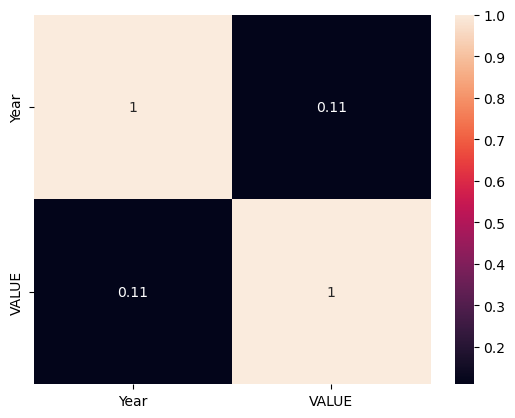

In [13]:
sns.heatmap(population.corr(),annot=True)

<Axes: xlabel='VALUE', ylabel='Count'>

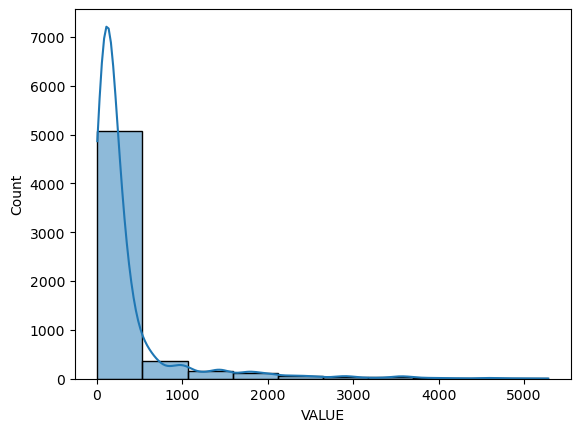

In [17]:
sns.histplot(population['VALUE'], kde =True,bins=10)

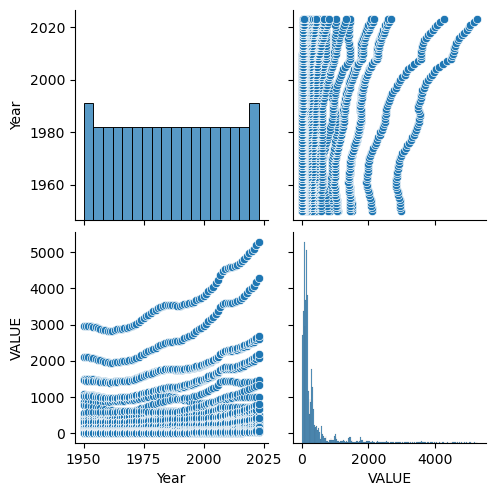

In [18]:
sns.pairplot(population)

### 1.1.2 Population  - Data Preparation

In [20]:
population.head()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN


In [21]:
population['Age Group'].unique()

array(['Under 1 year', '0 - 4 years', '0 - 14 years', '1 - 4 years',
       '5 - 9 years', '10 - 14 years', '15 - 19 years', '15 - 24 years',
       '15 years and over', '20 - 24 years', '25 - 29 years',
       '25 - 44 years', '30 - 34 years', '35 - 39 years', '40 - 44 years',
       '45 - 49 years', '45 - 64 years', '50 - 54 years', '55 - 59 years',
       '60 - 64 years', '65 - 69 years', '65 years and over',
       '70 - 74 years', '75 - 79 years', '80 - 84 years',
       '85 years and over', 'All ages'], dtype=object)

In [22]:
print(population['STATISTIC Label'].unique())
print(population['UNIT'].unique())

['Population Estimates (Persons in April)']
['Thousand']


we will remove the unit and stat columns as these provide no useful information to us:

In [23]:
population = population.drop(columns=['STATISTIC Label','UNIT'])

since the population is given in "thousands" in the original data, we multiply by 1000 to get actual value:

In [24]:
population['VALUE'] = population['VALUE']*1000

renaming columns to a format that is easier to manipulate/query:

In [25]:
population.columns = ['year','ages','sex','pop_estimate']

checking for null values

In [26]:
population.isnull().sum()

year              0
ages              0
sex               0
pop_estimate    114
dtype: int64

In [27]:
population[population['pop_estimate'].isnull()]['ages'].unique()

array(['0 - 4 years'], dtype=object)

values only null for 0 - 4 years in dataset. 

since we have values for under 1 years and 1 - 4 years category, we can
calculate these missing values, however for the purpose of this study we 
are not intereseted in this age category so we will ignore for now.

Checking for dublicates:

In [28]:
population.duplicated().sum()

0

In [29]:
population['ages'].unique()

array(['Under 1 year', '0 - 4 years', '0 - 14 years', '1 - 4 years',
       '5 - 9 years', '10 - 14 years', '15 - 19 years', '15 - 24 years',
       '15 years and over', '20 - 24 years', '25 - 29 years',
       '25 - 44 years', '30 - 34 years', '35 - 39 years', '40 - 44 years',
       '45 - 49 years', '45 - 64 years', '50 - 54 years', '55 - 59 years',
       '60 - 64 years', '65 - 69 years', '65 years and over',
       '70 - 74 years', '75 - 79 years', '80 - 84 years',
       '85 years and over', 'All ages'], dtype=object)

selecting out the age groups we are interested in only

In [30]:
age_group = ['All ages','0 - 14 years', '15 - 24 years', '25 - 44 years', 
             '45 - 64 years', '65 years and over']
population = population[population['ages'].isin(age_group)]
population = population.reset_index().drop(columns = ['index'])

In [31]:
population.isnull().sum()

year            0
ages            0
sex             0
pop_estimate    0
dtype: int64

For the purpose of this study, the "sex" category will not be analyzed, therefore we will select for "Both sexes" and drop this column:

In [32]:
population = population[population['sex']=='Both sexes'].drop(columns = ['sex'])

In [33]:
population.head()

,year,ages,pop_estimate
0,1950,0 - 14 years,851200.0
3,1950,15 - 24 years,452600.0
6,1950,25 - 44 years,773600.0
9,1950,45 - 64 years,574500.0
12,1950,65 years and over,317100.0


### 1.1.3 Population - quick visualization

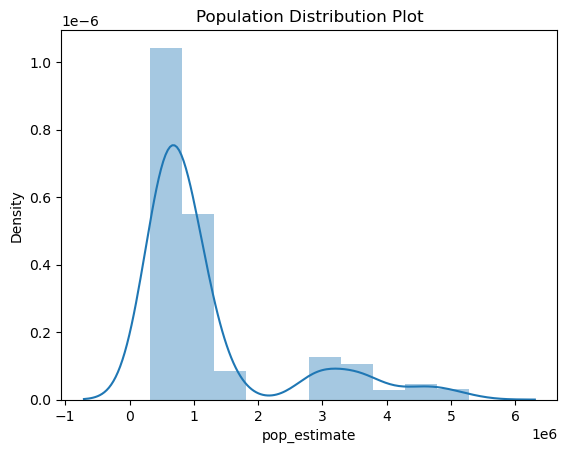

In [34]:
# Data distribution
plt.title('Population Distribution Plot')
sns.distplot(population['pop_estimate'],bins=10)
plt.show()

In [35]:
## lets have a look at the total population over the years
total_pop = population.loc[population['ages']=='All ages'].reset_index().drop(columns=['index'])
total_pop.head(5)

,year,ages,pop_estimate
0,1950,All ages,2969000.0
1,1951,All ages,2960600.0
2,1952,All ages,2952900.0
3,1953,All ages,2949000.0
4,1954,All ages,2941200.0


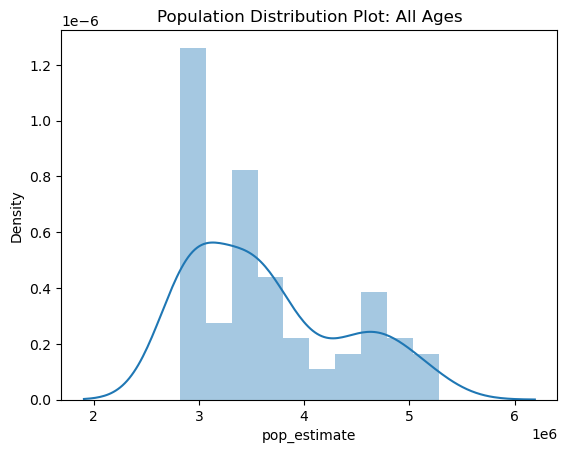

In [36]:
# Data distribution
plt.title('Population Distribution Plot: All Ages')
sns.distplot(total_pop['pop_estimate'],bins=10)
plt.show()

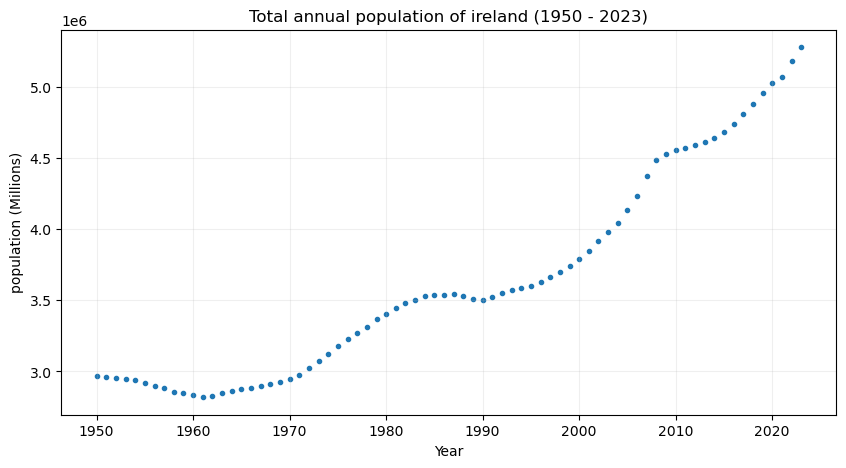

In [39]:
#scatter plot
plt.figure(figsize=(10,5))
plt.scatter(total_pop['year'],total_pop['pop_estimate'],marker='.')
plt.xlabel('Year')
plt.ylabel('population (Millions)')
first = total_pop['year'][0]
last = total_pop['year'][len(total_pop)-1]
plt.title(f'Total annual population of ireland ({first} - {last})')
plt.grid(True,alpha=0.2)
plt.show()

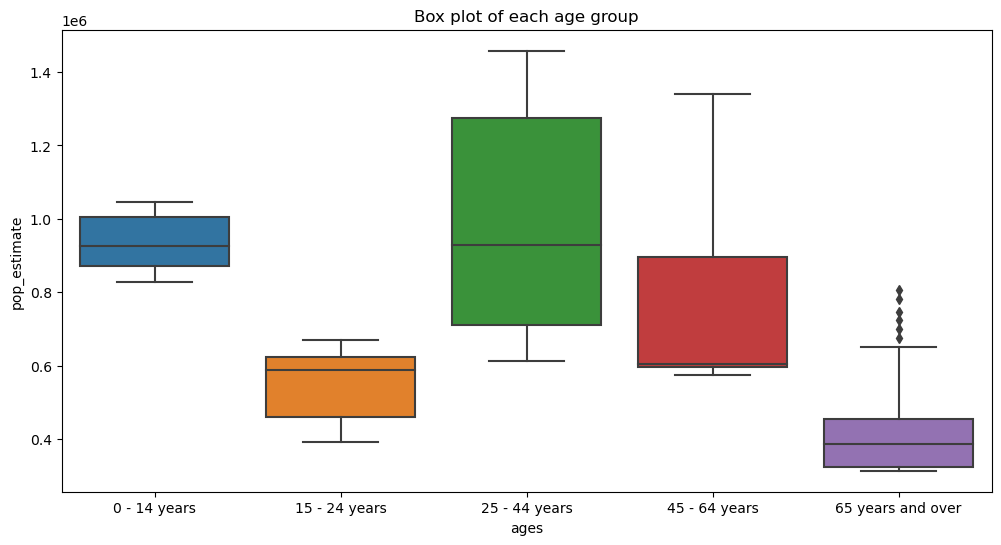

In [40]:
#box plots
plt.figure(figsize =(12,6))
sns.boxplot(data=population[population['ages']!='All ages'], x="ages", y="pop_estimate")
plt.title('Box plot of each age group')
plt.show()

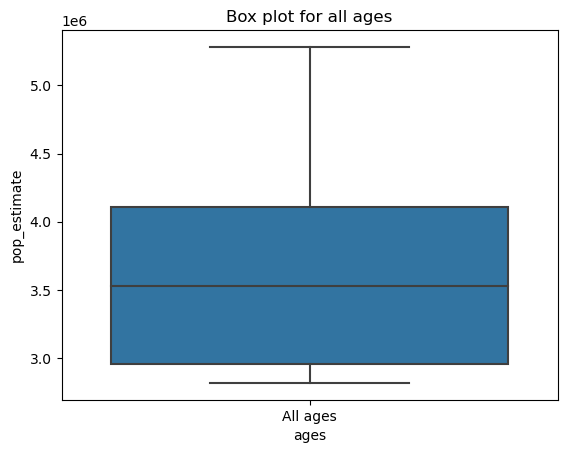

In [41]:
sns.boxplot(data=population[population['ages']=='All ages'], x="ages", y="pop_estimate")
plt.title('Box plot for all ages')
plt.show()

## 1.2 Migration Dataset 

### 1.2.1 Migration - Data understanding

In [80]:
# source: CSO ; Home/Population Estimates/Annual Population Estimates/PEA03 - Estimated Migration (Persons in April)
migration = pd.read_csv('PEA03.20231009T101018.csv')

In [81]:
migration.head()

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN


In [82]:
migration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATISTIC Label         1998 non-null   object 
 1   Year                    1998 non-null   int64  
 2   Age Group               1998 non-null   object 
 3   Sex                     1998 non-null   object 
 4   Inward or Outward Flow  1998 non-null   object 
 5   UNIT                    1998 non-null   object 
 6   VALUE                   1683 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 109.4+ KB


In [83]:
migration.describe(include = 'all')

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
count,1998,1998.000000,1998,1998,1998,1998,1683.000000
unique,1,NaN,6,3,3,1,NaN
top,Estimated Migration (Persons in April),NaN,All ages,Both sexes,Net migration,Thousand,NaN
freq,1998,NaN,333,666,666,1998,NaN
mean,NaN,2005.000000,NaN,NaN,NaN,NaN,10.856625
std,NaN,10.679751,NaN,NaN,NaN,NaN,17.070445
min,NaN,1987.000000,NaN,NaN,NaN,NaN,-43.900000
25%,NaN,1996.000000,NaN,NaN,NaN,NaN,1.200000
50%,NaN,2005.000000,NaN,NaN,NaN,NaN,4.500000
75%,NaN,2014.000000,NaN,NaN,NaN,NaN,14.000000


In [84]:
migration.nunique()

STATISTIC Label             1
Year                       37
Age Group                   6
Sex                         3
Inward or Outward Flow      3
UNIT                        1
VALUE                     471
dtype: int64

checking for nulls:

In [85]:
migration.isnull().sum()

STATISTIC Label             0
Year                        0
Age Group                   0
Sex                         0
Inward or Outward Flow      0
UNIT                        0
VALUE                     315
dtype: int64

checking for duplicate values

In [86]:
migration.duplicated().sum()

0

<Axes: >

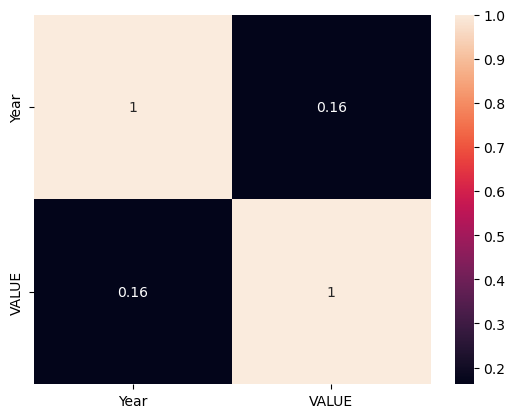

In [87]:
sns.heatmap(migration.corr(),annot=True)

<Axes: xlabel='VALUE', ylabel='Count'>

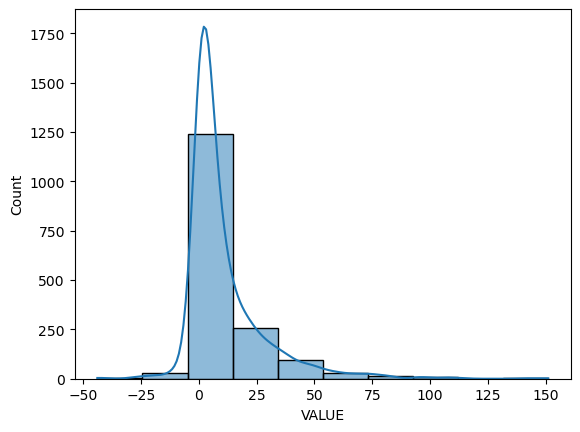

In [88]:
sns.histplot(migration['VALUE'], kde =True,bins=10)

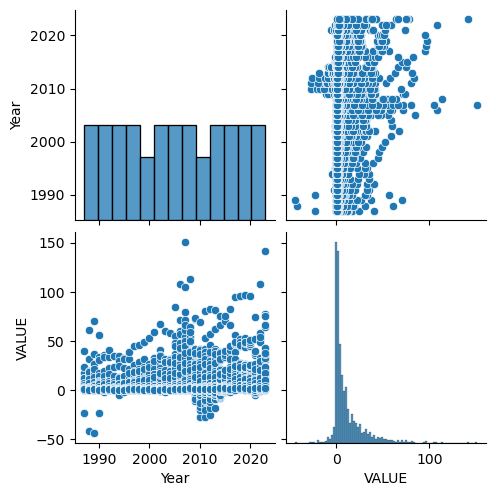

In [89]:
sns.pairplot(migration)

### 1.2.2 Migration - Data Preparation

Renaming column and removing unneccessary columns (stat and unit)

In [90]:
#renaming
migration.columns = ['stat','year','ages','sex','in/out','unit','value']

#removing
migration = migration.drop(columns=['stat','unit'])
migration['value']=migration['value']*1000

In [91]:
migration.head()

,year,ages,sex,in/out,value
0,1987,All ages,Both sexes,Net migration,-23000.0
1,1987,All ages,Both sexes,Emigrants: All destinations,40200.0
2,1987,All ages,Both sexes,Immigrants: All origins,17200.0
3,1987,All ages,Male,Net migration,NaN
4,1987,All ages,Male,Emigrants: All destinations,NaN


similar to what was done for population dataset. "Sex" is not a demographic that is going to be analysed as part of this project so every value that corresponds to Both sexes is selected, allowing this column to then be dropped 

In [92]:
migration = migration[migration['sex']=='Both sexes'].reset_index().drop(columns=['index'])

In [97]:
migration= migration.drop(columns = ['sex'])

In [98]:
migration['ages'].unique()

array(['All ages', '0 - 14 years', '15 - 24 years', '25 - 44 years',
       '45 - 64 years', '65 years and over'], dtype=object)

In [99]:
nulls = migration[migration['value'].isnull()]

In [100]:
nulls[nulls['ages']!='All ages']['in/out'].unique()

array(['Net migration'], dtype=object)

It can be seen from the above that the null values are only affecting "Net migration" values for each of the age groups (excluding All ages) we've excluded "All ages", as this can be calculated by summing accross the various age groups after.

### resolving migration dataset null values:

As we have seen above, the null values for each age group excluding "All ages" are only affecting the "Net Migration" values.

We can simply calculate this value with the knowledge that Net Migration = Immigration - Emigration.

Once we have these null values resolved for all age groups (excluding All ages), we can then calculate the null "All ages" values by aggregating across the age groups.

Using iterrows as part of a for loop allows me to iterate through all rows of the dataset, check if the net_migration is null, then fetch the corresponding imigration and emigration values for that specific "year" and "age group".

In [102]:
##looping through each row for all age groups apart from "All ages"
for i,row in migration.iterrows():
    if (math.isnan(row['value'])) & (not row['ages']=='All ages'):
        
        relevant_data = migration[(migration['year']==row['year']) & ((migration['ages']==row['ages']))]
        
        immigration = relevant_data[relevant_data['in/out'].str.contains('Immigrants')]['value'].values[0]
        emigration = relevant_data[relevant_data['in/out'].str.contains('Emigrants')]['value'].values[0]
        
        #calculating net migration 
        net_migration = immigration - emigration
        
        #updating null value to new value
        migration.iloc[i,migration.columns.get_loc('value')] = net_migration 
       

In [105]:
migration.isnull().sum()

year      0
ages      0
in/out    0
value     0
dtype: int64

In [106]:
migration.head()

,year,ages,in/out,value
0,1987,All ages,Net migration,-23000.0
1,1987,All ages,Emigrants: All destinations,40200.0
2,1987,All ages,Immigrants: All origins,17200.0
3,1987,0 - 14 years,Net migration,300.0
4,1987,0 - 14 years,Emigrants: All destinations,2800.0


#### Restructuring the migration dataset:
instead of having a column "in/out", the Net migration, Emigrants, and Immigrants values will all be moved to their own columns, removing the need for having the in/out column.

In [107]:
net = migration[migration['in/out'].str.contains('Net')].drop(columns='in/out').rename(columns = {'value':'net_migration'})
imm = migration[migration['in/out'].str.contains('Imm')].drop(columns='in/out').rename(columns = {'value':'immigration'})
em  = migration[migration['in/out'].str.contains('Em')].drop(columns='in/out').rename(columns = {'value':'emigration'})

In [108]:
em = em.merge(imm,on=['year','ages'],how='left')

In [109]:
migration = em.merge(net,on=['year','ages'],how='left')

taking a look at the resultant dataset

In [111]:
migration.head()

,year,ages,emigration,immigration,net_migration
0,1987,All ages,40200.0,17200.0,-23000.0
1,1987,0 - 14 years,2800.0,3100.0,300.0
2,1987,15 - 24 years,24000.0,5100.0,-18900.0
3,1987,25 - 44 years,11800.0,6100.0,-5700.0
4,1987,45 - 64 years,1700.0,1800.0,100.0


### 1.2.3 Migration Dataset - Visualization

<Axes: title={'center': 'correlation heatmap of the migration dataset'}>

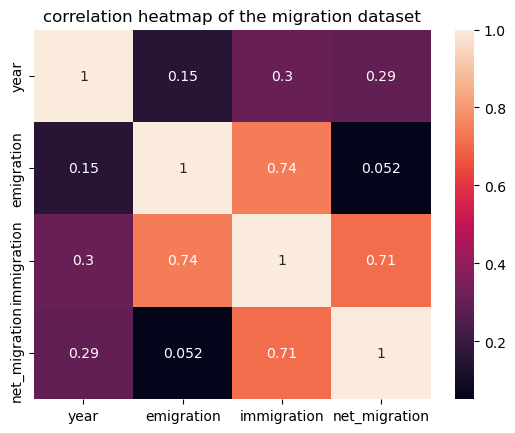

In [119]:
plt.title('correlation heatmap of the migration dataset')
sns.heatmap(migration.corr(),annot=True)

In [112]:
migration_all_ages = migration[migration['ages']=='All ages']

In [113]:
migration_all_ages.head()

,year,ages,emigration,immigration,net_migration
0,1987,All ages,40200.0,17200.0,-23000.0
6,1988,All ages,61100.0,19200.0,-41900.0
12,1989,All ages,70600.0,26700.0,-43900.0
18,1990,All ages,56300.0,33300.0,-22900.0
24,1991,All ages,35300.0,33300.0,-2000.0


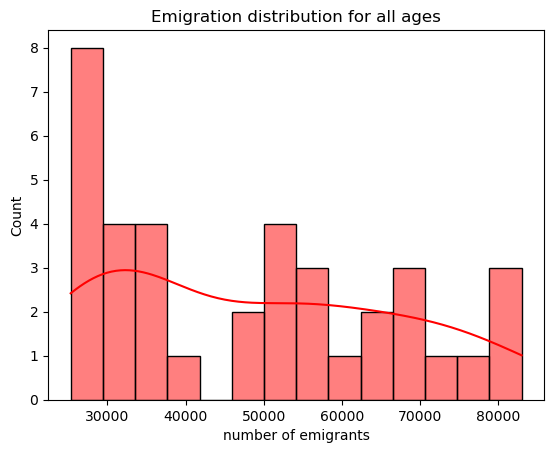

In [114]:
plt.title('Emigration distribution for all ages')
sns.histplot(migration_all_ages['emigration'], kde =True,bins=14,color='red')
plt.xlabel('number of emigrants');

Text(0.5, 0, 'number of Immigrants')

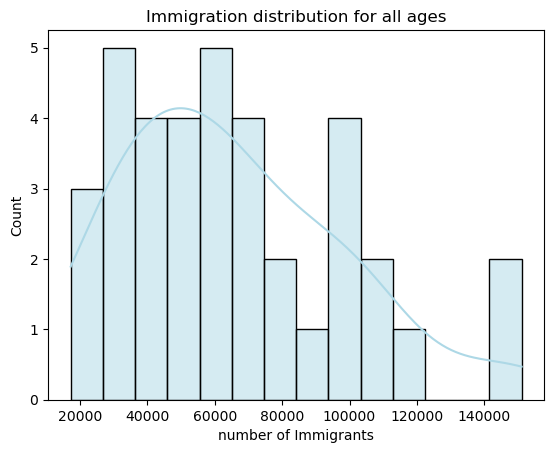

In [115]:
plt.title('Immigration distribution for all ages')
sns.histplot(migration_all_ages['immigration'], kde =True,bins=14,color='lightblue')
plt.xlabel('number of Immigrants')

## 1.3 Deaths Dataset

### 1.3.1 Deaths - Data understanding

In [137]:
# source: CSO ; Home/Births, Deaths & Marriages/Deaths Registered (Provisional)/VSAQ2 - Deaths Registered Provisional
deaths = pd.read_csv('VSAQ2.20231101T221123.csv')

In [138]:
deaths.head()

,STATISTIC Label,Quarter,Age at Death,UNIT,VALUE
0,Deaths Registered Provisional,1960Q1,Under 1 Year,Number,507.0
1,Deaths Registered Provisional,1960Q1,4 Weeks to 1 Year,Number,NaN
2,Deaths Registered Provisional,1960Q1,1 Week to 4 Weeks,Number,NaN
3,Deaths Registered Provisional,1960Q1,Under 7 Days,Number,NaN
4,Deaths Registered Provisional,1960Q1,1 to 7 Days,Number,NaN


In [139]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3795 entries, 0 to 3794
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  3795 non-null   object 
 1   Quarter          3795 non-null   object 
 2   Age at Death     3795 non-null   object 
 3   UNIT             3795 non-null   object 
 4   VALUE            3323 non-null   float64
dtypes: float64(1), object(4)
memory usage: 148.4+ KB


In [140]:
deaths.describe(include='all')

,STATISTIC Label,Quarter,Age at Death,UNIT,VALUE
count,3795,3795,3795,3795,3323.000000
unique,1,253,15,1,NaN
top,Deaths Registered Provisional,1960Q1,Under 1 Year,Number,NaN
freq,3795,15,253,3795,NaN
mean,NaN,NaN,NaN,NaN,606.498044
std,NaN,NaN,NaN,NaN,1173.366557
min,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,29.000000
50%,NaN,NaN,NaN,NaN,87.000000
75%,NaN,NaN,NaN,NaN,455.000000


In [141]:
deaths.isnull().sum()

STATISTIC Label      0
Quarter              0
Age at Death         0
UNIT                 0
VALUE              472
dtype: int64

In [142]:
deaths.duplicated().sum()

0

In [143]:
deaths.nunique()

STATISTIC Label       1
Quarter             253
Age at Death         15
UNIT                  1
VALUE              1078
dtype: int64

In [144]:
deaths['Age at Death'].unique()

array(['Under 1 Year', '4 Weeks to 1 Year', '1 Week to 4 Weeks',
       'Under 7 Days', '1 to 7 Days', 'Under 1 Day', '1 to 4 Years',
       '5 to 14 Years', '15 to 24 Years', '25 to 34 Years',
       '35 to 44 Years', '45 to 54 Years', '55 to 64 Years',
       '65 to 74 Years', '75 Years and Over'], dtype=object)

### 1.3.2 Deaths - Data Preparation

Need to convert quarters into years and aggregrate across each age range for each year to get final dataset:

In [145]:
#defining a year column, by extracting the year from the Quarter column 
deaths['year']=pd.DatetimeIndex(deaths['Quarter']).year

#dropping unwanted columns
deaths = deaths.drop(columns = ['STATISTIC Label','Quarter','UNIT'])

#renaming columns
deaths.columns = ['ages','deaths','year']
deaths.head()

,ages,deaths,year
0,Under 1 Year,507.0,1960
1,4 Weeks to 1 Year,NaN,1960
2,1 Week to 4 Weeks,NaN,1960
3,Under 7 Days,NaN,1960
4,1 to 7 Days,NaN,1960


need to sum by year and age group to get the correct number of deaths (i.e currently they are broken down by quarter)

In [146]:
## grouping by ages and year, then getting the sum of the deaths column
deaths = deaths.groupby(['ages','year']).sum().reset_index()

#selecting out the columns 
deaths = deaths[['year','ages','deaths']]

## sorting the values by year
deaths = deaths.sort_values('year').reset_index().drop(columns=['index'])

In [147]:
deaths['ages'].unique()

array(['1 Week to 4 Weeks', '65 to 74 Years', '1 to 7 Days',
       'Under 1 Year', 'Under 1 Day', '15 to 24 Years', '35 to 44 Years',
       '45 to 54 Years', '5 to 14 Years', '25 to 34 Years',
       '75 Years and Over', '55 to 64 Years', 'Under 7 Days',
       '4 Weeks to 1 Year', '1 to 4 Years'], dtype=object)

to ensure the age ranges are inline with that of the migration and population dataset, we will need to remove unwanted age ranges

In [148]:
deaths = deaths[deaths['ages'].isin(['Under 1 Year','1 to 4 Years','5 to 14 Years','15 to 24 Years',
                                '25 to 34 Years', '35 to 44 Years', '45 to 54 Years', '55 to 64 Years',
                                 '65 to 74 Years', '75 Years and Over']) ]

Using the available age ranges to determine the corresponding ranges used in the migration and population datasets

In [149]:
deaths.replace(to_replace=['Under 1 Year','1 to 4 Years','5 to 14 Years'],value='0 - 14 years',inplace=True)
deaths.replace(to_replace=['15 to 24 Years'],value='15 - 24 years',inplace=True)
deaths.replace(to_replace=['25 to 34 Years','35 to 44 Years'],value= '25 - 44 years',inplace=True)
deaths.replace(to_replace=['45 to 54 Years','55 to 64 Years'],value='45 - 64 years',inplace=True)
deaths.replace(to_replace=['65 to 74 Years','75 Years and Over'],value='65 years and over',inplace=True)

Now summing by each age range and year to aggregate the number of deaths (i.e the values that were once corresponding to Under 1 Year','1 to 4 Years','5 to 14 Years', will need to be summed to get the value for '0 - 14 years'

In [150]:
deaths = deaths.groupby(['year','ages']).sum().reset_index()

creating "All ages" entry

In [151]:
all_ages = deaths.groupby(['year']).sum('deaths').reset_index()
all_ages['ages']='All ages'
all_ages=all_ages[['year','ages','deaths']]
deaths = pd.concat([all_ages,deaths]).sort_values('year').reset_index().drop(columns=['index'])

In [152]:
deaths.head()

,year,ages,deaths
0,1960,All ages,32658.0
1,1960,65 years and over,22524.0
2,1960,45 - 64 years,6344.0
3,1960,25 - 44 years,1203.0
4,1960,15 - 24 years,258.0


In [153]:
deaths.isnull().sum()

year      0
ages      0
deaths    0
dtype: int64

### 1.3.3 Deaths Dataset - Visualization

In [154]:
deaths.head()

,year,ages,deaths
0,1960,All ages,32658.0
1,1960,65 years and over,22524.0
2,1960,45 - 64 years,6344.0
3,1960,25 - 44 years,1203.0
4,1960,15 - 24 years,258.0


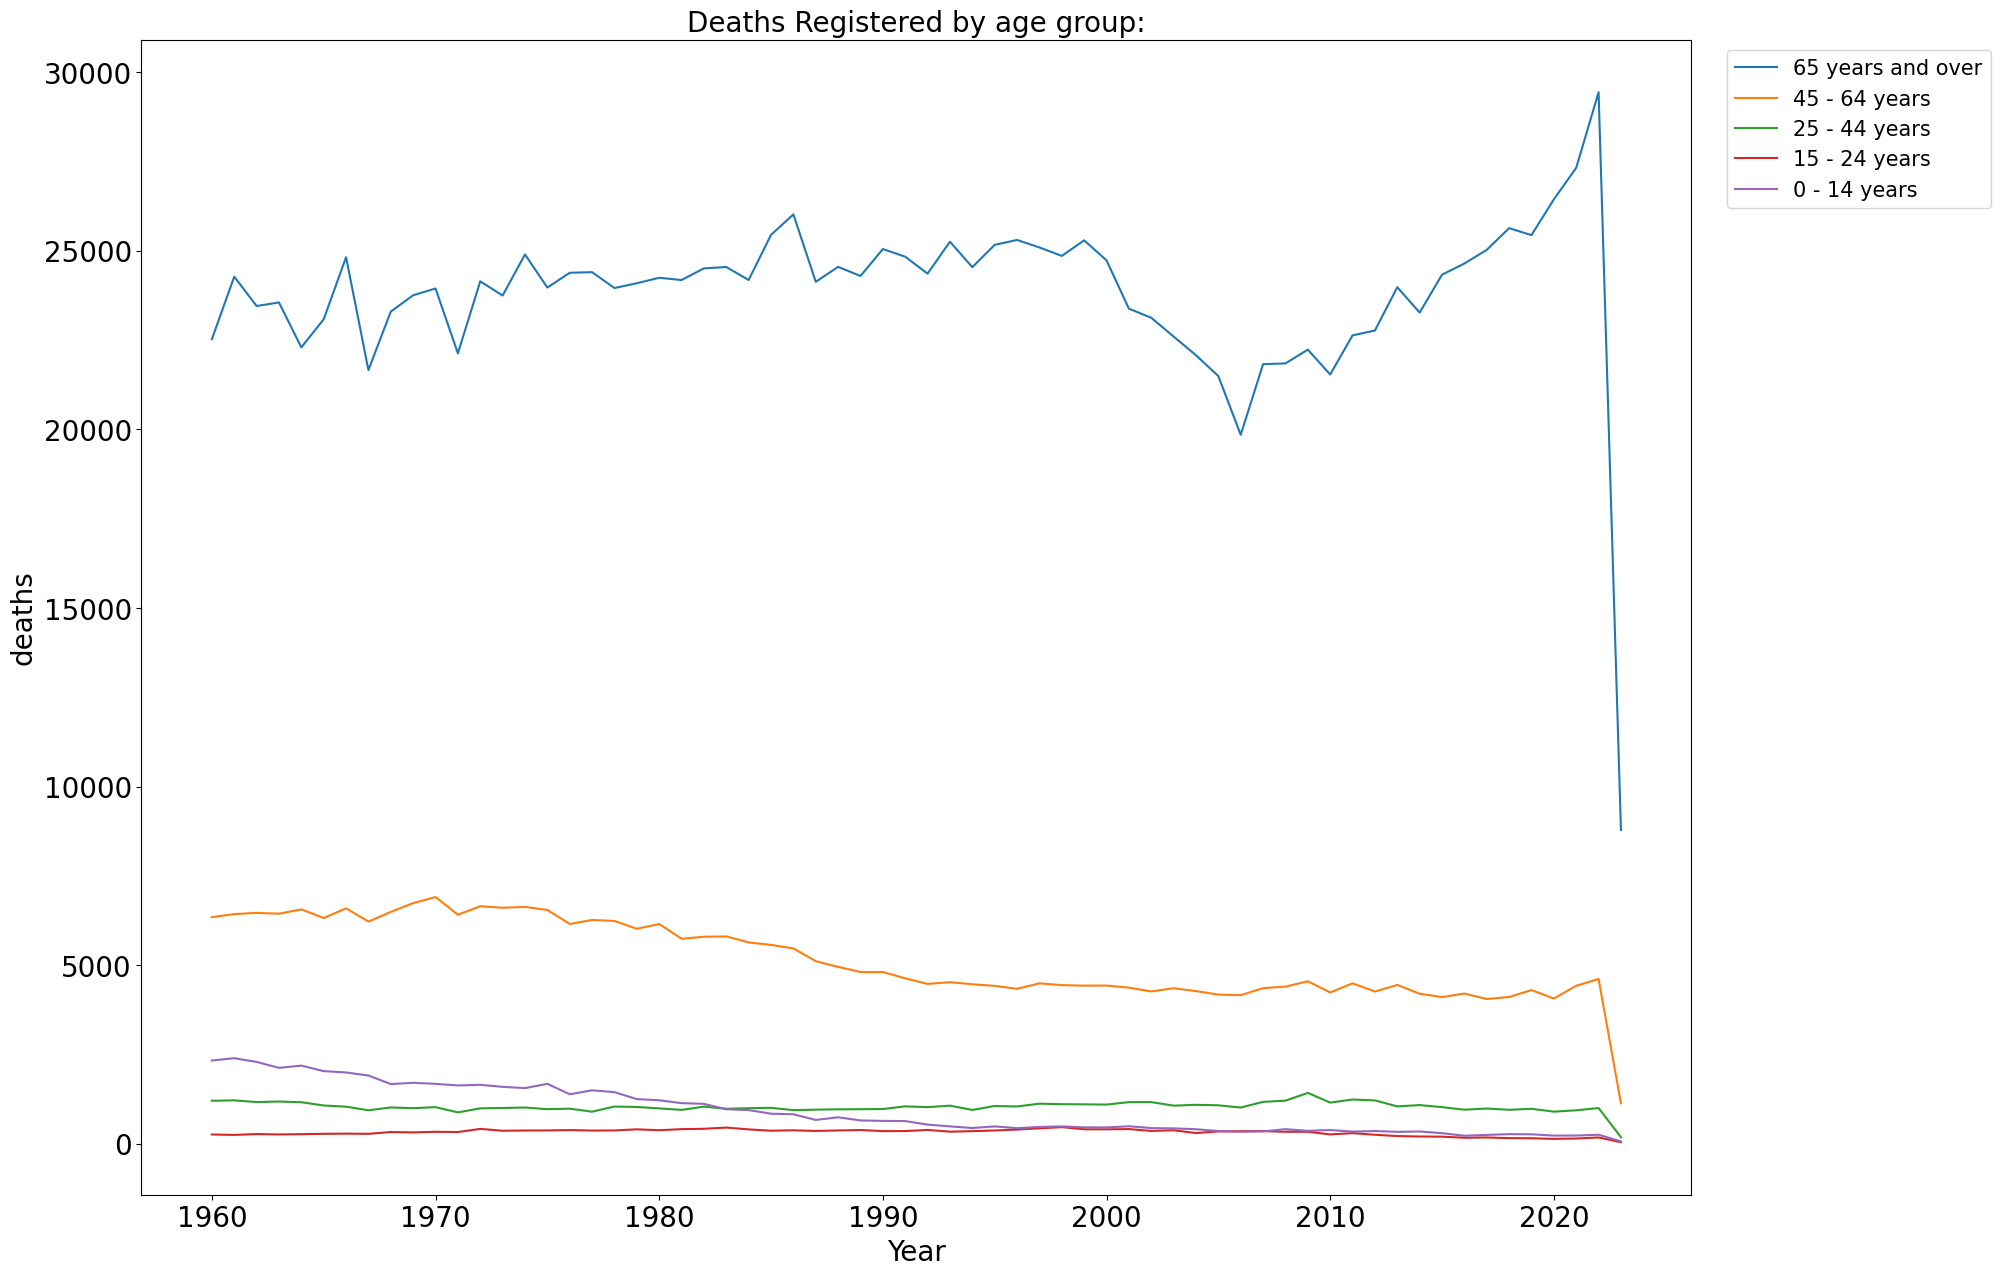

In [155]:
plt.figure(figsize =(20,15))
sns.lineplot(x='year',y='deaths',hue='ages',data=deaths[deaths['ages']!='All ages']);
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1),fontsize=15);
plt.xlabel('Year',fontsize=20)
plt.ylabel('deaths',fontsize=20)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.title('Deaths Registered by age group:',fontsize=20);

The observed drop-off in all age groups is due to 2023s data being incomplete, as this study was carried out in 2023.

# 1.4 Births Dataset

### 1.4.1 Births - Data Understanding

In [195]:
#source CSO; Home/Births, Deaths & Marriages/Births, Deaths and Marriages/VSQ01 - Births and Deaths Registered
births = pd.read_csv('VSQ01.20231028T221021.csv')

In [196]:
births.head()

,Statistic Label,Quarter,Sex,UNIT,VALUE
0,Population,1960Q1,Both sexes,Number,NaN
1,Population,1960Q1,Male,Number,NaN
2,Population,1960Q1,Female,Number,NaN
3,Population,1960Q2,Both sexes,Number,2832000.0
4,Population,1960Q2,Male,Number,1427000.0


In [197]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3795 entries, 0 to 3794
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistic Label  3795 non-null   object 
 1   Quarter          3795 non-null   object 
 2   Sex              3795 non-null   object 
 3   UNIT             3795 non-null   object 
 4   VALUE            2265 non-null   float64
dtypes: float64(1), object(4)
memory usage: 148.4+ KB


In [198]:
births.describe()

,VALUE
count,2.265000e+03
mean,3.004020e+05
std,9.286326e+05
min,1.980000e+02
25%,4.411000e+03
50%,7.754000e+03
75%,1.338800e+04
max,5.100229e+06


In [199]:
births.nunique()

Statistic Label       5
Quarter             253
Sex                   3
UNIT                  1
VALUE              2042
dtype: int64

In [200]:
births.isnull().sum()

Statistic Label       0
Quarter               0
Sex                   0
UNIT                  0
VALUE              1530
dtype: int64

In [201]:
births.duplicated().sum()

0

In [202]:
births['Statistic Label'].unique()

array(['Population', 'Births Registered',
       'Births Within Marriage Registered',
       'Births Outside Marriage Registered', 'Deaths Registered'],
      dtype=object)

In [203]:
births['Statistic Label'].unique()

array(['Population', 'Births Registered',
       'Births Within Marriage Registered',
       'Births Outside Marriage Registered', 'Deaths Registered'],
      dtype=object)

### 1.4.2 Births - Data Preparation

In [204]:
births = births[births['Statistic Label']=='Births Registered']
births.drop(columns = ['Statistic Label','UNIT'],inplace = True)

In [205]:
births.isnull().sum()

Quarter    0
Sex        0
VALUE      0
dtype: int64

In [206]:
births.columns = ['quarter','sex','value']

In [207]:
births['year']=pd.DatetimeIndex(births['quarter']).year

In [208]:
births.head()

,quarter,sex,value,year
759,1960Q1,Both sexes,14614.0,1960
760,1960Q1,Male,7500.0,1960
761,1960Q1,Female,7114.0,1960
762,1960Q2,Both sexes,16494.0,1960
763,1960Q2,Male,8487.0,1960


In [209]:
births = births.groupby(['sex','year']).sum().reset_index()
births = births.sort_values('year').reset_index().drop(columns=['index'])

In [210]:
births['ages'] ='All ages'
births = births[['year','ages','sex','value']]

In [211]:
births.rename(columns={'value':'births'},inplace = True)

In [212]:
births = births[births['sex']=='Both sexes'].drop(columns = 'sex')

In [213]:
births = births.reset_index().drop(columns = ['index'])
births.head()

,year,ages,births
0,1960,All ages,60730.0
1,1961,All ages,59826.0
2,1962,All ages,61611.0
3,1963,All ages,62966.0
4,1964,All ages,64008.0


In [214]:
births['births'] = births['births'].astype('int64')

drop the current year (2023) as not completed yet:

In [215]:
births = births.query('year < 2023')

In [216]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    63 non-null     int64 
 1   ages    63 non-null     object
 2   births  63 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 2.0+ KB


### 1.4.3 Births Dataset - Visualization

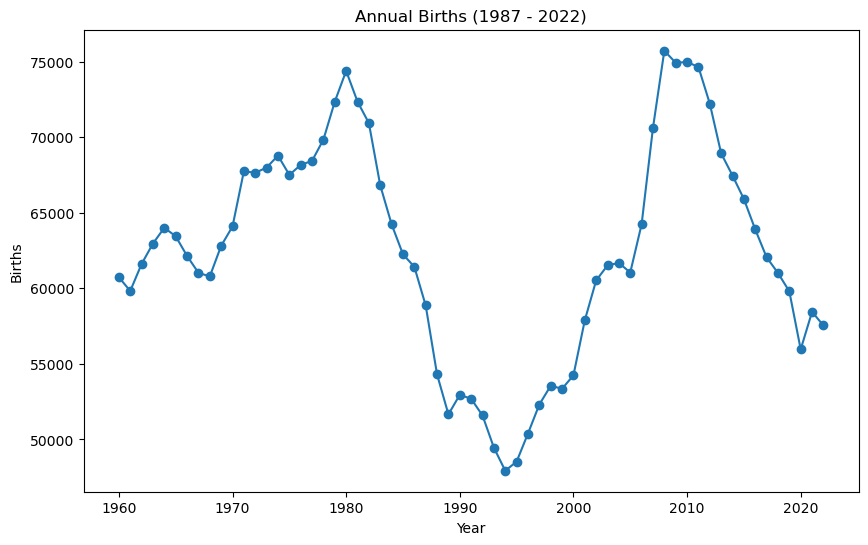

In [220]:
plt.figure(figsize = (10,6))
plt.plot(births['year'],births['births'],'-o')
plt.xlabel('Year')
plt.ylabel('Births')
plt.title('Annual Births (1987 - 2022)');

## 1.5 Creating pop_df dataset by merging all above - Data Preparation

In this section the dataset pop_df which will be used for all the statistical analysis and machine learning modelling will be created by merging the population,migration,deaths and births datasets

In [221]:
pop_df =  migration.merge(population, on=['year','ages'],how='left')

In [222]:
pop_df = pop_df.merge(deaths, on=['year','ages'],how = 'left')

In [223]:
pop_df = pop_df.merge(births, on=['year','ages'],how='left')

Removing 2023 from dataset as this will be ignored due to incomplete readings for the year (i.e births/deaths/migration not representing full year)

In [224]:
pop_df = pop_df.query('year < 2023')

In [225]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           216 non-null    int64  
 1   ages           216 non-null    object 
 2   emigration     216 non-null    float64
 3   immigration    216 non-null    float64
 4   net_migration  216 non-null    float64
 5   pop_estimate   216 non-null    float64
 6   deaths         216 non-null    float64
 7   births         36 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.2+ KB


In [226]:
pop_df.head()

,year,ages,emigration,immigration,net_migration,pop_estimate,deaths,births
0,1987,All ages,40200.0,17200.0,-23000.0,3546500.0,31219.0,58864.0
1,1987,0 - 14 years,2800.0,3100.0,300.0,1014400.0,666.0,NaN
2,1987,15 - 24 years,24000.0,5100.0,-18900.0,615800.0,358.0,NaN
3,1987,25 - 44 years,11800.0,6100.0,-5700.0,936000.0,954.0,NaN
4,1987,45 - 64 years,1700.0,1800.0,100.0,592100.0,5110.0,NaN


In [227]:
##emigration,immigration,net_migration,pop_estimate,deaths should all be integer types
recast_cols = ['emigration','immigration','net_migration','pop_estimate','deaths']
for col in recast_cols:
    pop_df[col]=pop_df[col].astype('int64')

For the purposes of applying machine learning models and statistical distributions to the data, the age groups will be used to calculate the dependency ratios instead of being left as a categorical column. As evident from the above head of pop_df, leaving the ages variable in the dataset will result in NaN values being present within the births variable. Therefore once the age dependency values are calculated and joined to the dataset, I will select where ages='All ages' and subsequently remove this column.

In [228]:
##saving a copy of this dataframe 
pop_df_age_groups = pop_df.copy()
pop_df_age_groups = pop_df_age_groups[pop_df_age_groups['ages']!='All ages']

### 1.5.1 Creating Dependency Ratio Features

- Total Dependency Ratio =100 x (Population (0-14) + Population (65+)) / Population (15-64) 
- Old Age Dependency Ratio =100 x (Population (65+) / Population (15-64)) 
- Youth Dependency Ratio =100 x (Population (0-14) / Population (15-64)) 

dep_ratio is a function that ive defined that will read in dataframe and calculate the old,young and total dependency ratios based on the above formulae. This reason I created a function for this, is so it can be applied to each year individually in the subsequent for loop

In [229]:
#defining function to calculate the ratios
def dep_ratio(tab):
    non_dependent_ages = ['15 - 24 years', '25 - 44 years','45 - 64 years']
    tot_dependent_ages = ['0 - 14 years','65 years and over']
    youth_dependent_ages = ['0 - 14 years']
    old_dependent_ages = ['65 years and over']
    
    non_dep = tab[tab['ages'].isin(non_dependent_ages)]['pop_estimate'].sum()
    tot_dep = tab[tab['ages'].isin(tot_dependent_ages)]['pop_estimate'].sum()
    old_dep = tab[tab['ages'].isin(old_dependent_ages)]['pop_estimate'].sum()
    youth_dep = tab[tab['ages'].isin(youth_dependent_ages)]['pop_estimate'].sum()
    
    #ratio = (no. dependents/no. non-dependents)*100
    tot_ratio = (tot_dep/non_dep)*100
    old_ratio = (old_dep/non_dep)*100
    youth_ratio = (youth_dep/non_dep)*100
    
    #returning 3 results
    return tot_ratio,old_ratio,youth_ratio

Looping through each year and appending the results for the ratios to an empty matrix. This will be used to create a new dataframe with columns: 'year', 'tot_dependency_ratio', 'old_dependency_ratio', 'youth_dependency_ratio'

In [230]:
## looping through each year and applying function
ratios = np.zeros(((len(pop_df['year'].unique())),4))

for index,year in enumerate(pop_df['year'].unique()):
    df = pop_df.loc[pop_df['year']==year]
    ratios[index][0] = int(year)
    ratios[index][1] = dep_ratio(df)[0]
    ratios[index][2] = dep_ratio(df)[1]
    ratios[index][3] = dep_ratio(df)[2]
    

creating the new dataframe with results

In [231]:
dependency_ratio = pd.DataFrame({'year':ratios[:,0],
                                 'tot_dependency_ratio':ratios[:,1],
                                 'old_dependency_ratio':ratios[:,2],
                                 'youth_dependency_ratio':ratios[:,3]})

casting year as an integer

In [232]:
dependency_ratio['year']=(dependency_ratio['year']).astype('int64')

Since we no longer need the ages column, we will select out 'All ages' and drop the 'ages' column

In [234]:
pop_df = pop_df[pop_df['ages']=='All ages']

In [235]:
pop_df = pop_df.reset_index().drop(columns = ['index','ages'])

merging new dependency_ratio dataframe with pop_df

In [236]:
pop_df = pop_df.merge(dependency_ratio,on=['year'],how='left')

In [237]:
pop_df.head()

,year,emigration,immigration,net_migration,pop_estimate,deaths,births,tot_dependency_ratio,old_dependency_ratio,youth_dependency_ratio
0,1987,40200,17200,-23000,3546500,31219,58864.0,65.422828,18.107188,47.315640
1,1988,61100,19200,-41900,3530700,31575,54300.0,64.705882,18.342119,46.363764
2,1989,70600,26700,-43900,3509500,31103,51659.0,64.102684,18.582250,45.520434
3,1990,56300,33300,-22900,3505800,31818,52954.0,62.966578,18.593409,44.373170
4,1991,35300,33300,-2000,3525700,31498,52690.0,61.563488,18.462173,43.101315


### 1.5.2 Creating NaturalGrowth Feature

creating a new field "NaturalGrowth" by taking the no. of births from no. of deaths (to be analyzed later):

In [238]:
pop_df['NaturalGrowth']=pop_df['births'] - pop_df['deaths']

In [239]:
pop_df.tail()

,year,emigration,immigration,net_migration,pop_estimate,deaths,births,tot_dependency_ratio,old_dependency_ratio,youth_dependency_ratio,NaturalGrowth
31,2018,51600,96000,44400,4884900,31116,61016.0,52.935099,21.176544,31.758555,29900.0
32,2019,53100,97100,44000,4958500,31134,59796.0,52.966219,21.638130,31.328089,28662.0
33,2020,50900,95600,44700,5029900,31765,55959.0,52.879852,22.069238,30.810614,24194.0
34,2021,52300,74100,21800,5074700,33055,58443.0,52.866223,22.514083,30.352140,25388.0
35,2022,56100,107800,51700,5184000,35477,57540.0,52.992563,23.058081,29.934482,22063.0


In [240]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    36 non-null     int64  
 1   emigration              36 non-null     int64  
 2   immigration             36 non-null     int64  
 3   net_migration           36 non-null     int64  
 4   pop_estimate            36 non-null     int64  
 5   deaths                  36 non-null     int64  
 6   births                  36 non-null     float64
 7   tot_dependency_ratio    36 non-null     float64
 8   old_dependency_ratio    36 non-null     float64
 9   youth_dependency_ratio  36 non-null     float64
 10  NaturalGrowth           36 non-null     float64
dtypes: float64(5), int64(6)
memory usage: 3.4 KB


# Section 2: Visualising the pop_df

## 2.1 population change, net_migration and naturalgrowth

deriving the population change variable as the difference between each subsequent pop_estimate using .diff()

In [251]:
pop_change = pop_df.copy()
pop_change['population_change'] = pop_change.pop_estimate.diff()

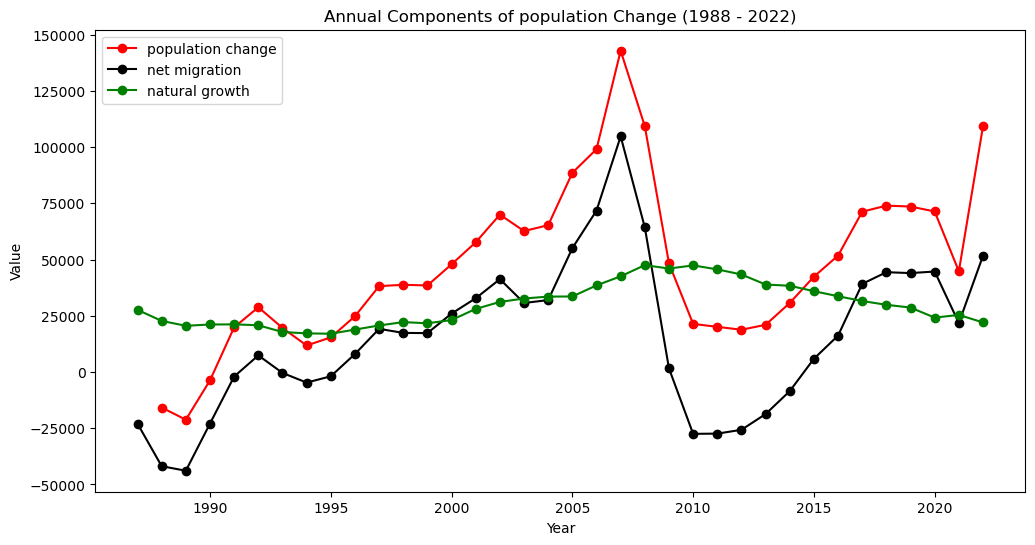

In [487]:
plt.figure(figsize=(12,6))
plt.plot(pop_change['year'], pop_change['population_change'], '-o',label='population change',c='red')
plt.plot(pop_change['year'], pop_change['net_migration'],'-o',label='net migration',c='black')
plt.plot(pop_change['year'], pop_change['NaturalGrowth'], '-o',label='natural growth',c='green')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.title('Annual Components of population Change (1988 - 2022)');

## 2.2 Deaths per capita for each age group

In [243]:
deaths_per_cap = deaths.merge(population,on=['year','ages'],how='left')
deaths_per_cap[['deaths','pop_estimate']] = deaths_per_cap[['deaths','pop_estimate']].astype('int64')
deaths_per_cap['deaths_per_100k'] = (deaths_per_cap['deaths']/deaths_per_cap['pop_estimate'])*100000
deaths_per_cap = deaths_per_cap.query('year < 2023')

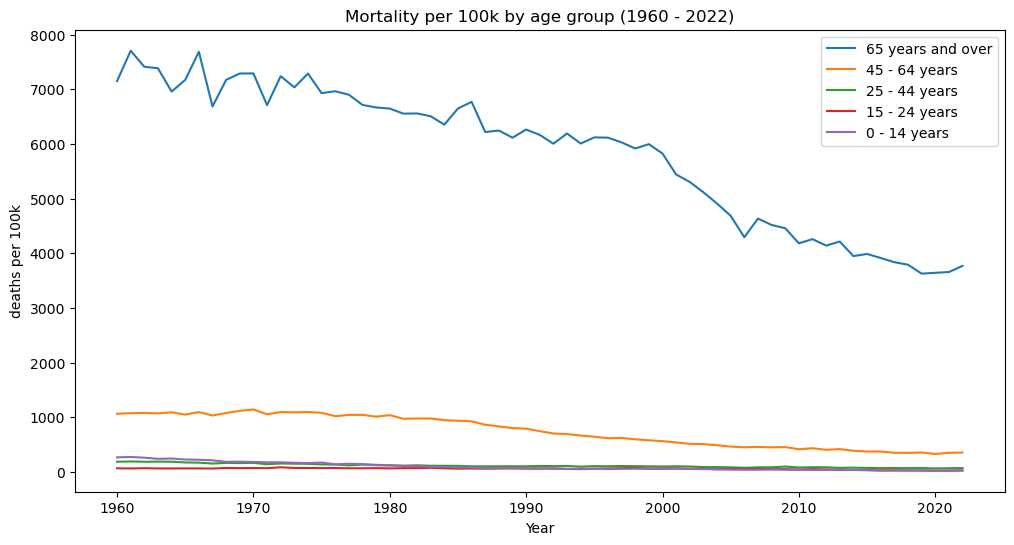

In [250]:
plt.figure(figsize =(12,6))
sns.lineplot(x='year',y='deaths_per_100k',hue='ages',data=deaths_per_cap[deaths_per_cap['ages']!='All ages']);
plt.legend(fontsize=10)
plt.xlabel('Year')
plt.ylabel('deaths per 100k')
plt.yticks();
plt.title('Mortality per 100k by age group (1960 - 2022)');

## 2.3 Net Migration, immigration and emigration

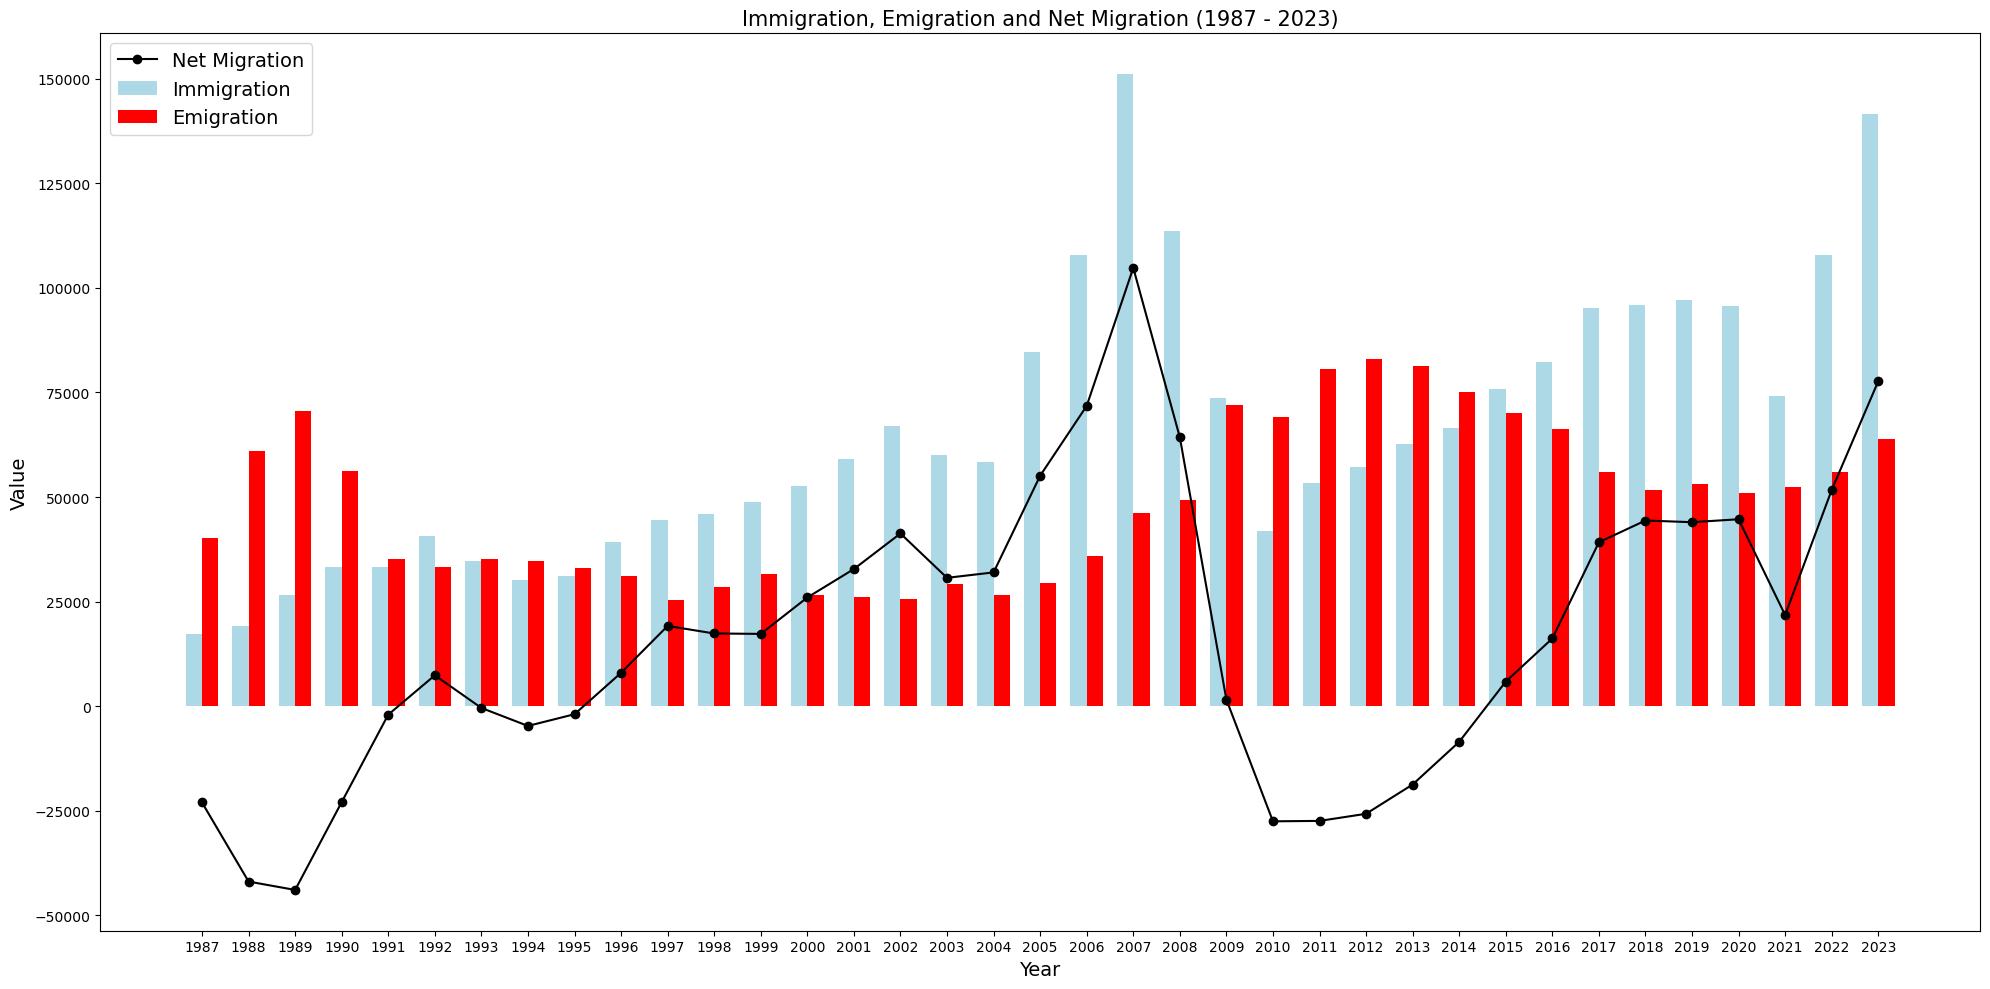

In [245]:
plt.subplots(figsize=(20,10))

##creating a multiple bar plot 
bar_width = 0.35
xlab = range(len(migration_all_ages['year']))
offset = [i + bar_width for i in xlab]
mid = [i + bar_width / 2 for i in xlab]

plt.bar(xlab,migration_all_ages['immigration'],label='Immigration',width= bar_width,color='lightblue')
plt.bar(offset,migration_all_ages['emigration'],label='Emigration',width= bar_width,color='red')
plt.plot(mid,migration_all_ages['net_migration'], label='Net Migration',color='black',marker='o')

plt.xticks([i + bar_width / 2 for i in xlab], migration_all_ages['year'])
plt.legend(fontsize=14)
plt.title("Immigration, Emigration and Net Migration (1987 - 2023)",fontsize =15)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.tight_layout()


## 2.4 old/youth dependency ratios

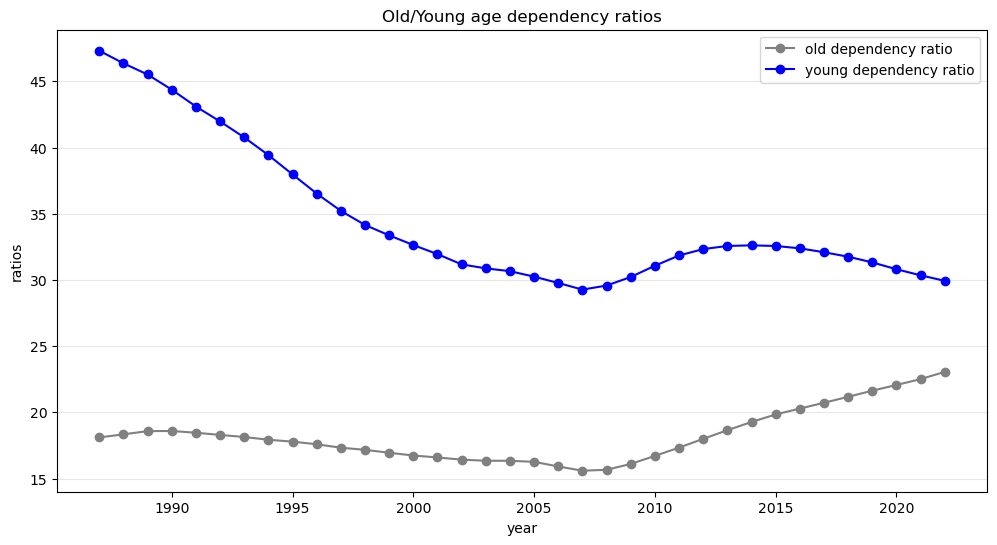

In [246]:
plt.figure(figsize=(12,6))
plt.plot(dependency_ratio['year'],dependency_ratio['old_dependency_ratio'],'o-',label='old dependency ratio',c='gray')
plt.plot(dependency_ratio['year'],dependency_ratio['youth_dependency_ratio'],'o-',label='young dependency ratio',c='b')
plt.legend()
plt.grid(axis='y',alpha=0.3)
plt.xlabel('year')
plt.ylabel('ratios')
plt.title('Old/Young age dependency ratios');

# Section 3 - Statistical Analysis

## 3.1 descriptive statistics

In [247]:
pop_df_age_groups.head()

,year,ages,emigration,immigration,net_migration,pop_estimate,deaths,births
1,1987,0 - 14 years,2800,3100,300,1014400,666,NaN
2,1987,15 - 24 years,24000,5100,-18900,615800,358,NaN
3,1987,25 - 44 years,11800,6100,-5700,936000,954,NaN
4,1987,45 - 64 years,1700,1800,100,592100,5110,NaN
5,1987,65 years and over,0,1100,1100,388200,24131,NaN


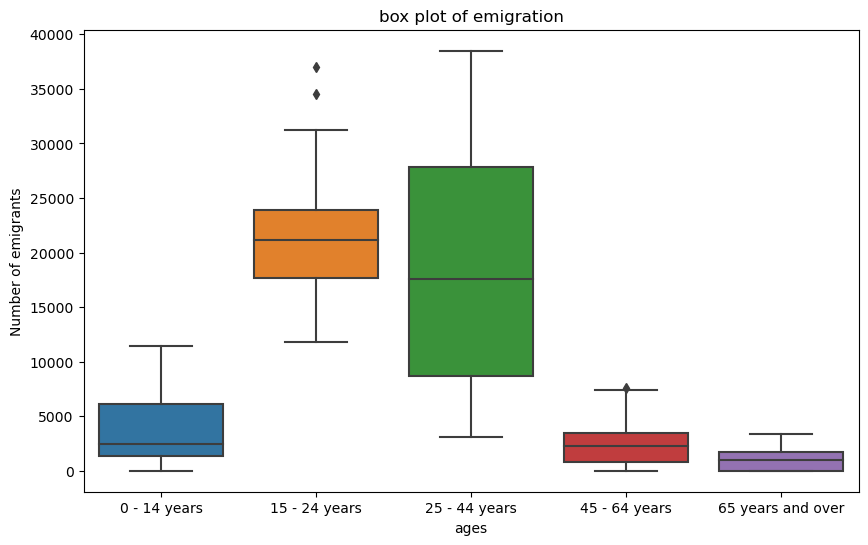

In [248]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ages',y='emigration',data = pop_df_age_groups)
plt.title('box plot of emigration')
plt.ylabel('Number of emigrants');

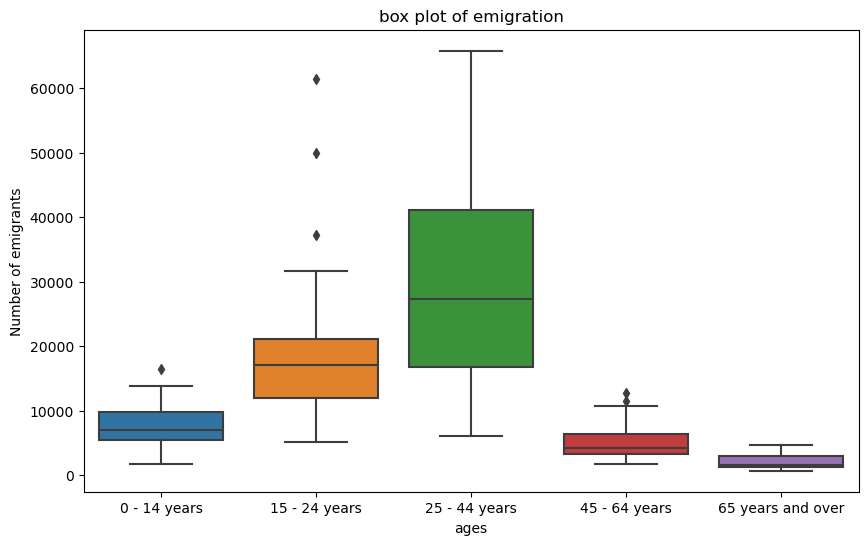

In [252]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ages',y='immigration',data = pop_df_age_groups)
plt.title('box plot of emigration')
plt.ylabel('Number of emigrants');

no need to describe the year column, so this will be dropped from the describe function

In [253]:
pop_df.drop(columns = ['year']).describe()

,emigration,immigration,net_migration,pop_estimate,deaths,births,tot_dependency_ratio,old_dependency_ratio,youth_dependency_ratio,NaturalGrowth
count,36.000000,36.000000,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,48027.777778,63288.888889,15252.777778,4.176747e+06,30313.138889,60078.388889,52.798881,18.238137,34.560744,29765.250000
std,18593.341529,30503.964874,33675.981149,5.534587e+05,1828.755176,8197.025454,5.764536,2.009259,5.367323,9466.475462
min,25300.000000,17200.000000,-43900.000000,3.505800e+06,25707.000000,47929.000000,44.865259,15.592929,29.272330,17033.000000
25%,31425.000000,40325.000000,-5650.000000,3.619900e+06,28970.750000,53254.000000,48.358288,16.684256,30.860461,21551.250000
50%,47750.000000,58750.000000,16750.000000,4.089500e+06,30761.500000,59330.000000,52.479502,17.967243,32.362308,28366.000000
75%,62375.000000,82875.000000,39725.000000,4.622375e+06,31502.000000,64655.000000,54.529663,18.808079,36.888553,36559.500000
max,83000.000000,151100.000000,104800.000000,5.184000e+06,35477.000000,75724.000000,65.422828,23.058081,47.315640,47532.000000


In [254]:
pop_df.head()

,year,emigration,immigration,net_migration,pop_estimate,deaths,births,tot_dependency_ratio,old_dependency_ratio,youth_dependency_ratio,NaturalGrowth
0,1987,40200,17200,-23000,3546500,31219,58864.0,65.422828,18.107188,47.315640,27645.0
1,1988,61100,19200,-41900,3530700,31575,54300.0,64.705882,18.342119,46.363764,22725.0
2,1989,70600,26700,-43900,3509500,31103,51659.0,64.102684,18.582250,45.520434,20556.0
3,1990,56300,33300,-22900,3505800,31818,52954.0,62.966578,18.593409,44.373170,21136.0
4,1991,35300,33300,-2000,3525700,31498,52690.0,61.563488,18.462173,43.101315,21192.0


Looking at some distributions of data

Text(0.5, 0, 'number of Immigrants')

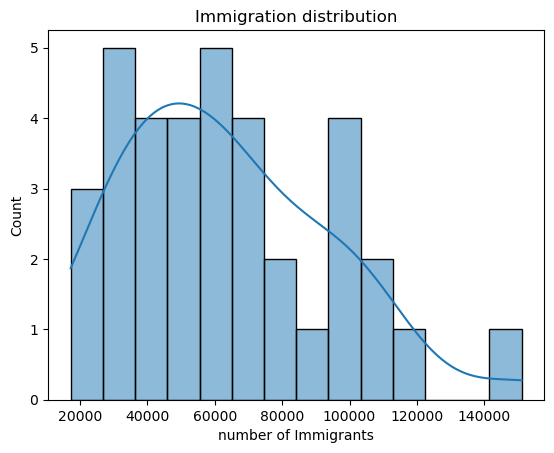

In [255]:
plt.title('Immigration distribution')
sns.histplot(pop_df['immigration'], kde =True,bins=14)
plt.xlabel('number of Immigrants')

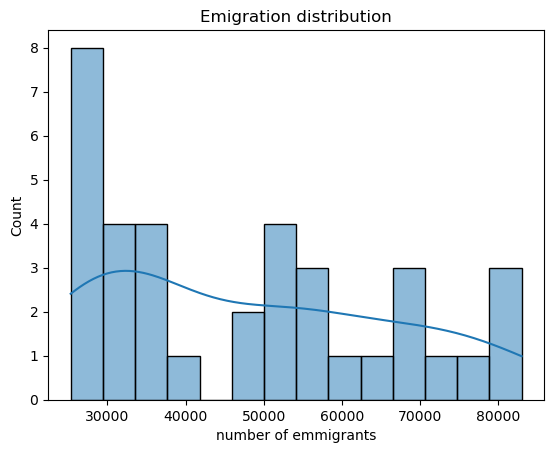

In [256]:
plt.title('Emigration distribution')
sns.histplot(pop_df['emigration'], kde =True,bins=14)
plt.xlabel('number of emmigrants')
plt.show()

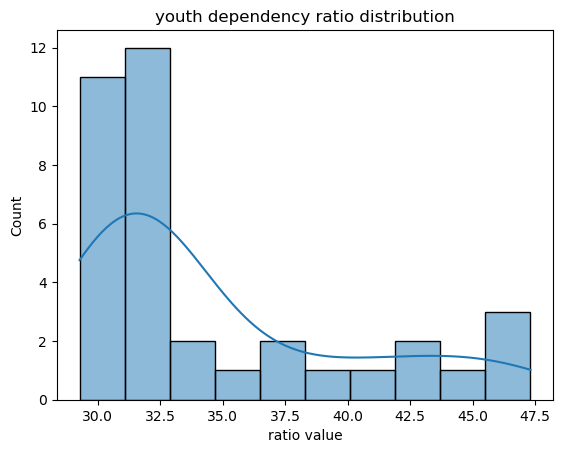

34.560744122234375
32.36230773206553


In [257]:
plt.title('youth dependency ratio distribution')
sns.histplot(pop_df['youth_dependency_ratio'], kde =True,bins=10)
plt.xlabel('ratio value')
plt.show()

print(pop_df['youth_dependency_ratio'].mean())
print(pop_df['youth_dependency_ratio'].median())

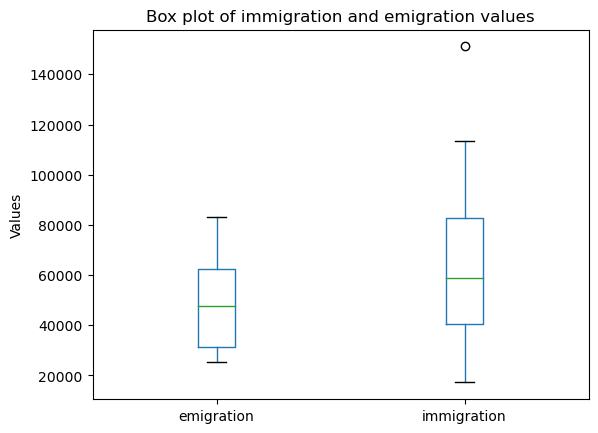

In [258]:
pop_df[['emigration','immigration']].boxplot()
plt.title('Box plot of immigration and emigration values')
plt.ylabel('Values')
plt.grid(False)
plt.show()

In [259]:
pop_df['immigration'].max()

151100

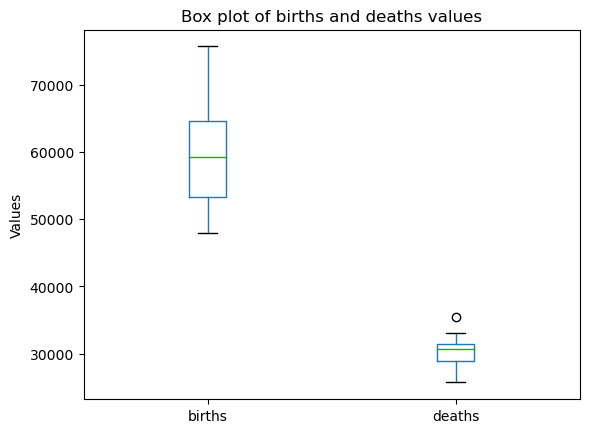

In [260]:
pop_df[['births','deaths']].boxplot()
plt.title('Box plot of births and deaths values')
plt.ylabel('Values')
plt.grid(False)
plt.show()

## 3.2 Binomial Distribution

if we take a random sample from the tot_dependency_ratio variable, what is the probability that the value is above 50% (i.e majority of the population is a dependent)



if we chose 10 random dependency ratio values, what is the probability that one of them will be above 50%

success = dependency ratio is greater than 50% (i.e majority of population is of a dependent age)
failure = dependency ratio is 50 or under

In [261]:
pop_df['tot_dependency_ratio'].shape

(36,)

#### Binomial Distribution Definition:
The binomial distribution function specifies the number of times (x) that an event occurs in n independent trials where p is the probability of the event occurring in a single trial. It is an exact probability distribution for any number of discrete trials.

The binomial probability, P(x) (i.e probability for success of each trial) can be determined using the function:
$$
P(x) = \binom{n}{x} p^x q^{n - x}
$$

However, with python we can call on the "binom" class from scipy.stats module to calculate this probability for us. 


Included in this class are three useful functions: 

1) pmf (probability mass function) - P(X = x)
2) cdf (cumulative distribution function) - P(X < x)
3) sf (survival function) - P(X > x)

X = discrete random variable representing number of successes within sample


In [262]:
## number of trials
n = 10

In [263]:
## probability of success (# success divided by total sample)

number_of_successes = len(pop_df.loc[pop_df['tot_dependency_ratio']>50])
total = len(pop_df)
p = number_of_successes/total
p

0.6666666666666666

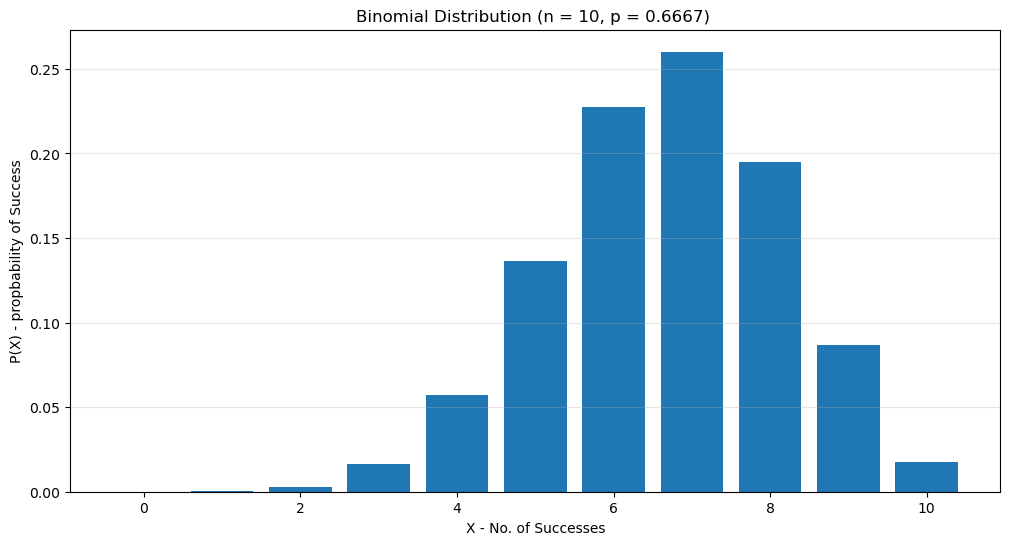

In [265]:
n = 10
X = np.arange(0,n + 1)
p = number_of_successes/total

## running the binom pmf on the variables
binom_values = binom.pmf(k = X,n = n, p = p)


## plotting the distributions
fig, ax = plt.subplots(1, figsize=(12, 6))
plt.bar(X,binom_values)

plt.xlabel('X - No. of Successes')
plt.ylabel('P(X) - propbability of Success')
plt.title(f'Binomial Distribution (n = {n}, p = {round(p,4)}) ');
plt.grid(axis='y',alpha=.3)

In [266]:
## P(X = 5) (probability that exactly 5 are above 50)
binom.pmf(k = 5,n = n,p = p)

0.13656454808718183

In [267]:
## P(X < 5) (probability that less than 5 are above 50)
binom.cdf(k = 5, n = n, p = p)

0.21312808006909523

In [268]:
## P(X > 5) (probability that more than 5 are above 50)
binom.sf(k = 5, n = n, p = p)

0.7868719199309048

## 3.3 Poisson Distribution


The Poisson distribution is a discrete distribution that measures the probability of a given number of events happening in a specified time period.

We can assume from the dataset that the births column is Poisson distributed:
- we do not know the limit to the number of births that can occur during the time period indicated (1 year)
- The occurrances of each events is independent (i.e one birth will not affect the probability of another person being born)
- the occurrance of each event is random

In [269]:
pop_df['births'].shape

(36,)

In [270]:
pop_df.head()

,year,emigration,immigration,net_migration,pop_estimate,deaths,births,tot_dependency_ratio,old_dependency_ratio,youth_dependency_ratio,NaturalGrowth
0,1987,40200,17200,-23000,3546500,31219,58864.0,65.422828,18.107188,47.315640,27645.0
1,1988,61100,19200,-41900,3530700,31575,54300.0,64.705882,18.342119,46.363764,22725.0
2,1989,70600,26700,-43900,3509500,31103,51659.0,64.102684,18.582250,45.520434,20556.0
3,1990,56300,33300,-22900,3505800,31818,52954.0,62.966578,18.593409,44.373170,21136.0
4,1991,35300,33300,-2000,3525700,31498,52690.0,61.563488,18.462173,43.101315,21192.0


It is observed that if the mean of a distribution is large (i.e ~1000) the distribution will tend towards a normal distribution.

To alleviate this, the births is taken in "thousands".

In [271]:
avg = (pop_df['births'].mean())/1000
stdev = (pop_df['births'].std())/1000
print(f'average number of births per year: {avg} thousand')

average number of births per year: 60.07838888888889 thousand


Plotting the Distributions:

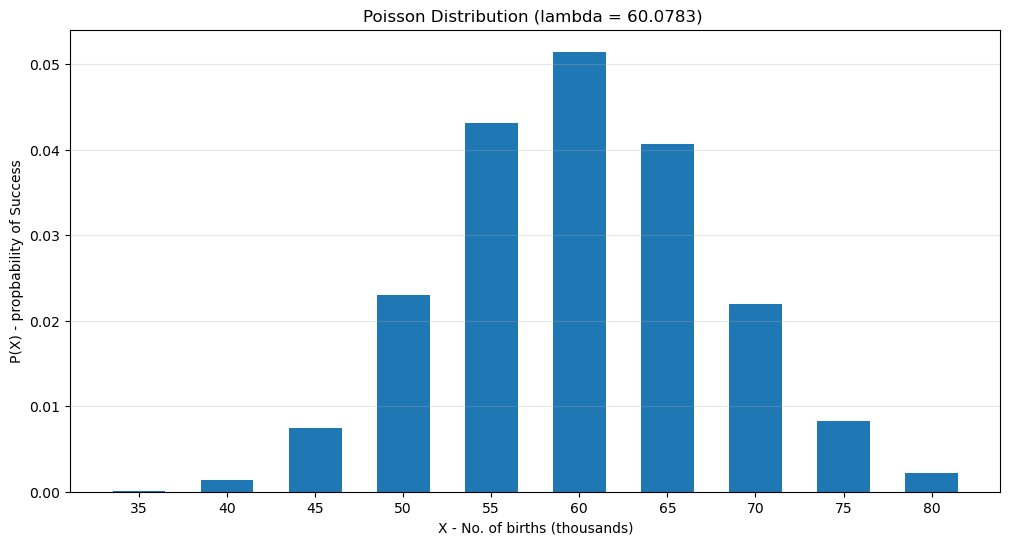

In [273]:
## defining k (random variables i.e births) with 3 standard deviations about the mean
k_values = np.arange(int(avg - (3*stdev)),int(avg + (3*stdev)),5)
poisson_values = poisson.pmf(k = k_values,mu = avg)


## plotting the poisson distribution
plt.figure(figsize=(12,6))
plt.bar(k_values,poisson_values,width=3)
plt.xlabel('X - No. of births (thousands)')
plt.ylabel('P(X) - propbability of Success')
plt.title('Poisson Distribution (lambda = 60.0783) ')
plt.xticks(k_values);
plt.grid(True,alpha=0.3,axis='y')

Plotting the cumulative distribution function for values up to 70k

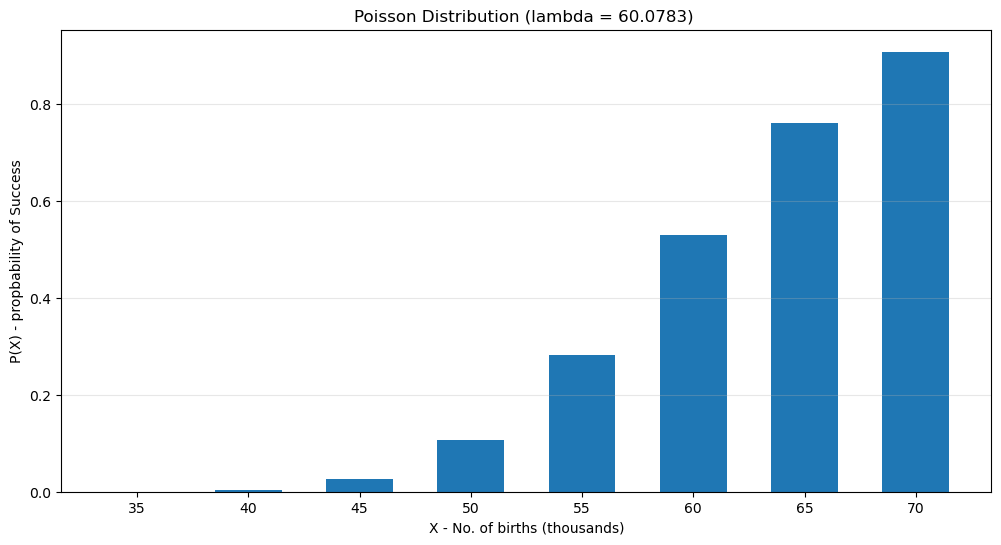

In [275]:
k_values = np.arange(35,75,5)
poisson_values = poisson.cdf(k = k_values,mu = avg)

plt.figure(figsize=(12,6))
plt.bar(k_values,poisson_values,width=3)
plt.xlabel('X - No. of births (thousands)')
plt.ylabel('P(X) - propbability of Success')
plt.title('Poisson Distribution (lambda = 60.0783) ')
plt.xticks(k_values);
plt.grid(True,alpha=0.3,axis='y')

In [276]:
# probability that there will be 50k births in a year i.e P(X = 70)
poisson.pmf(k = 70, mu = avg)

0.02188575993966207

In [277]:
# probability that there will be 70k or less births i.e P(X < 70)
poisson.cdf(k=70, mu=avg)

0.9081088189756321

In [278]:
# probability that there will be 50k or less births i.e P(X < 50)
poisson.cdf(k=50, mu=avg)

0.10586556569524438

In [279]:
# probability that there will more than 70k births
poisson.sf(k=70, mu=avg)

0.09189118102436786

## 3.4 Normal Distribution

A Normal (Gaussian) distribution is a probability distribution that is symmetric about the mean. Before conducting any specific analysis we need to determine which variables in our dataset possess characteristics of a Gaussian Distribution. To do this, we must carry out some tests:


### 3.4.1 Visual Tests:

In [286]:
## PLOTTING THE DISTRIBUTIONS:

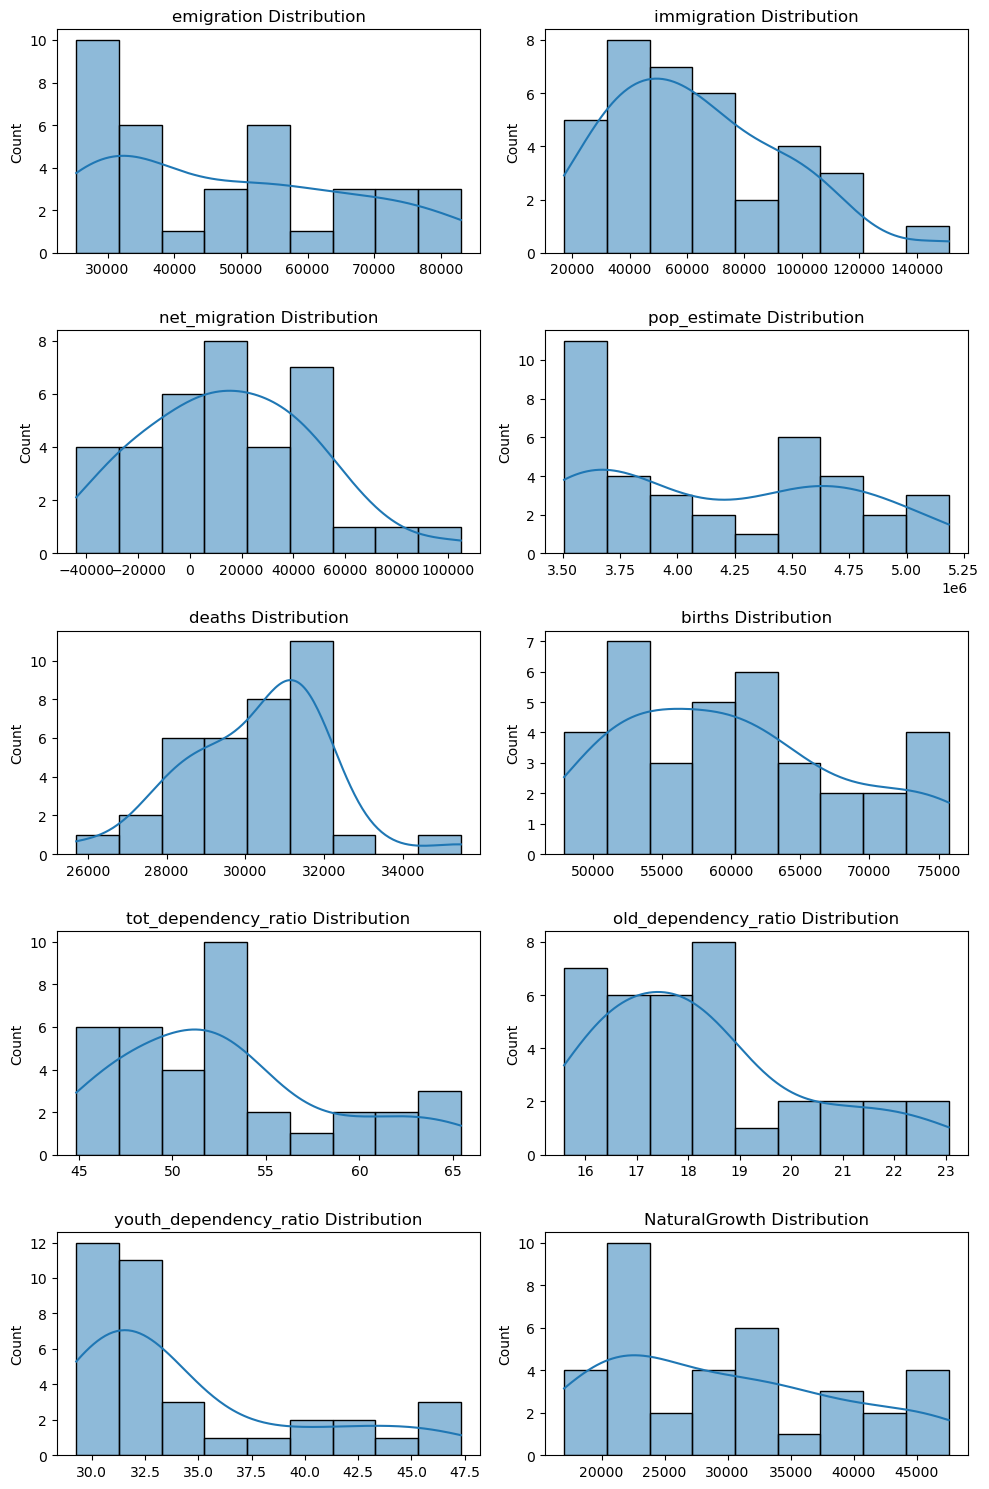

In [287]:
fig,axes = plt.subplots(5,2,figsize=(10,15))
axes = axes.ravel()
cols = ['emigration', 'immigration', 'net_migration', 'pop_estimate','deaths', 'births','tot_dependency_ratio'
        ,'old_dependency_ratio','youth_dependency_ratio','NaturalGrowth']

for col,ax in zip(cols,axes):
    sns.histplot(pop_df[col], kde =True,ax=ax,bins=9)
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel('')

fig.tight_layout()
plt.show()

### 3.4.2 Quantile-Quantile plots

From above distributions net_migration and deaths appear to have distributions most resembling Gaussian.

Plotting Q-Q plots to further check for normal distribution for these two variables:


To plot Q-Q plots, the zscores for each variable will firstly need to be determined using the zscore function from the stats module

In [288]:
z_migration = zscore(pop_df['net_migration'])
z_deaths = zscore(pop_df['deaths'])

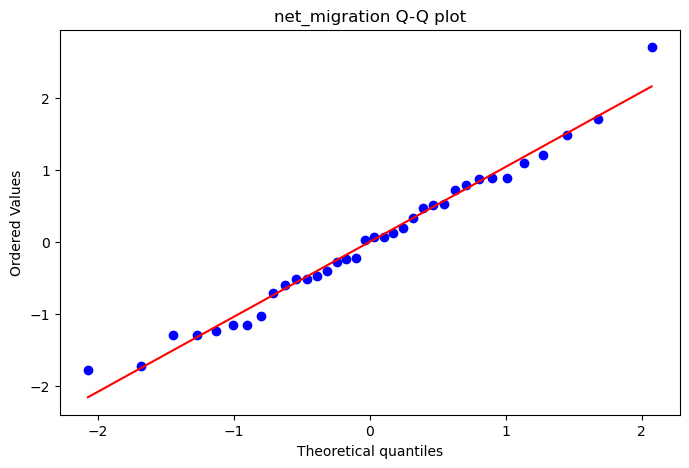

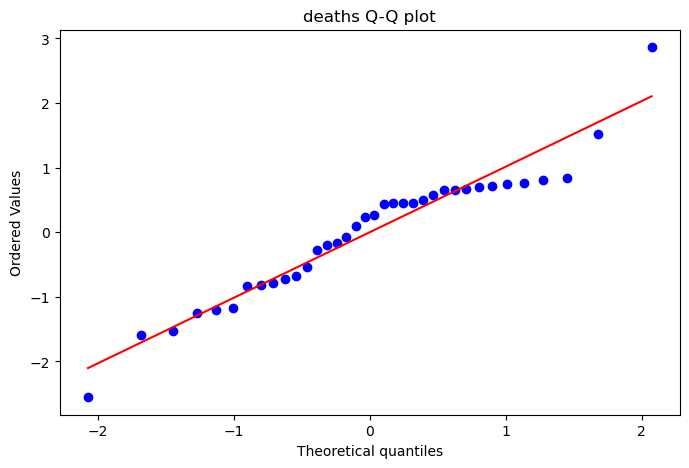

In [289]:
plt.figure(figsize = (8,5))
stats.probplot(z_migration, dist="norm", plot=plt)
plt.title("net_migration Q-Q plot")
plt.show()

plt.figure(figsize=(8,5))
stats.probplot(z_deaths, dist="norm", plot=plt)
plt.title("deaths Q-Q plot")
plt.show()

Looks like net_migration might be the best estimate of a normal distribution. To confirm this a brief statistical normality test will be carried out on the variable:


### 3.4.3 Statistical Tests:

The two well-known tests of normality, namely, the Kolmogorov–Smirnov test and the Shapiro–Wilk test are most widely used methods to test the normality of the data.

The Shapiro–Wilk test is more appropriate method for small sample sizes (<50 samples) although it can also be handling on larger sample size while Kolmogorov–Smirnov test is used for n ≥50. Therefore in this instance we will use the Shapiro-Wilk test

If the P-Value of the Shapiro-Wilk Test is larger than 0.05, we assume a normal distribution

If the P-Value of the Shapiro-Wilk Test is smaller than 0.05, we do not assume a normal distribution


The null hypothesis for the Shapiro-Wilk test is that the population is distributed normally. The alternate hypothesis, therefore, is that the population is not distributed normally.

ref: https://medium.com/geekculture/how-to-perform-the-shapiro-wilk-test-in-python-a8ab52e4b463
ref: https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93

In [290]:
stat,p = shapiro(pop_df['net_migration'])

In [291]:
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.980, p=0.762


In [292]:
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject null hypothesis)')
else:
    print('Sample does not look Gaussian (reject null hypothesis)')

Sample looks Gaussian (fail to reject null hypothesis)


### 3.4.4 Normal Distribution

determining the variables for determining the normal distribution

In [294]:
net_mig = pop_df['net_migration'].sort_values().values
net_mig_zscore = zscore(pop_df['net_migration'])
net_mig_mean = pop_df['net_migration'].mean()
net_mig_std = pop_df['net_migration'].std()

print(f'mean of the net_migration values: {net_mig_mean}')
print(f'standard deviation of the net_migration values: {net_mig_std}')

mean of the net_migration values: 15252.777777777777
standard deviation of the net_migration values: 33675.98114902083


In [295]:
## what is the probability that the net_migration is less than 0 (i.e emigration > immigration)
## P(X < 0)
norm.cdf(0, net_mig_mean, net_mig_std)

0.325300475874473

In [296]:
## what is the probability that the net_migration is greater than 0 (i.e immigration > emigration)
## P(X > 0)

In [297]:
norm.sf(0, net_mig_mean,net_mig_std)

0.6746995241255269

Plotting the normal distribution

In [298]:
norm_dist = norm.pdf(net_mig,net_mig_mean,net_mig_std)

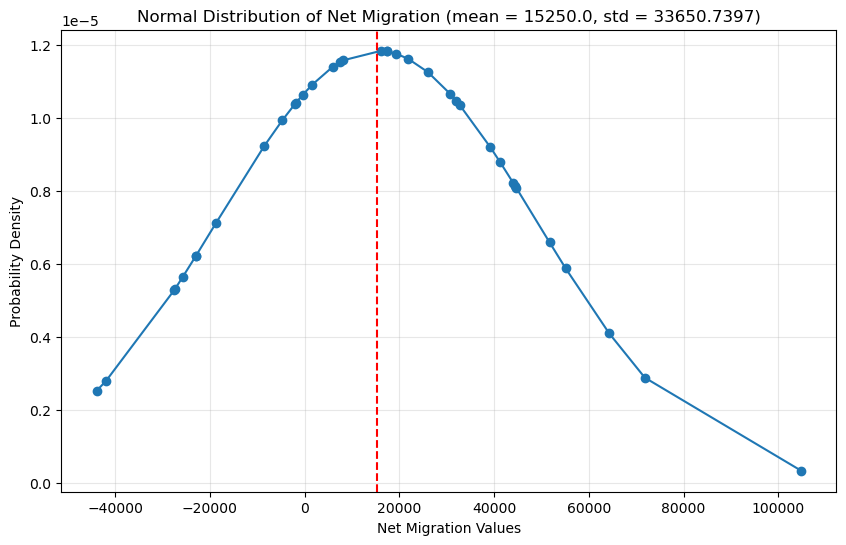

In [299]:
plt.figure(figsize = (10,6))
plt.plot(net_mig,norm_dist,marker='o',label='Dist')
plt.axvline(net_mig_mean,ls='--',c='r',label = 'Mean')
plt.xlabel('Net Migration Values')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Net Migration (mean = 15250.0, std = 33650.7397)')
plt.grid(True,alpha = 0.3)
#plt.legend()

for a bigger number of values, create a range of net migration values 4 standard deviations about the mean using np.arrange

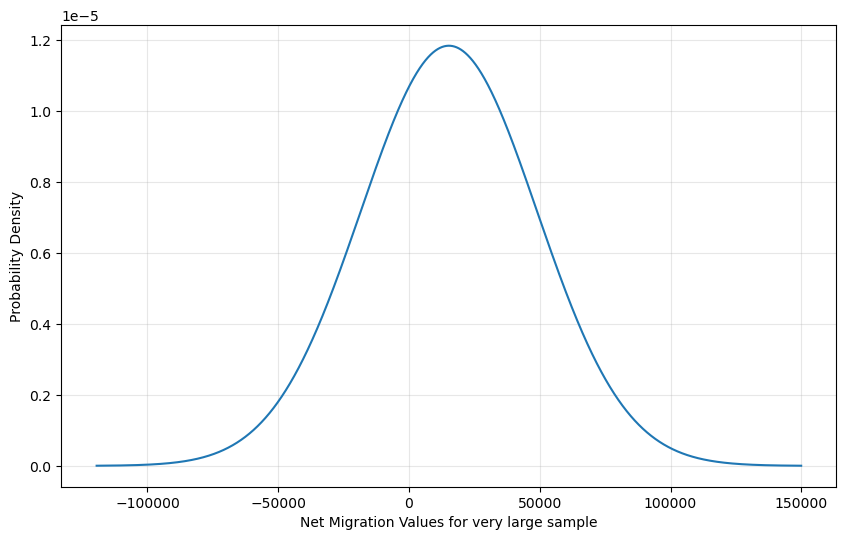

In [300]:
data = np.arange((net_mig_mean - 4*(net_mig_std)),(net_mig_mean + 4*(net_mig_std)))
norm_dist_data = norm.pdf(data,net_mig_mean,net_mig_std)


plt.figure(figsize = (10,6))
plt.plot(data,norm_dist_data)
plt.xlabel('Net Migration Values for very large sample')
plt.ylabel('Probability Density')
plt.grid(True,alpha = 0.3)

# Section 4 - Modelling

In this section of the analysis we set out to forecast and predict various aspects of our dataset through the use of supervised machine learning models: 

1) Linear Regression (univariable/multivariable) - population forecasting
2) Ridge/Lasso Regularization to correct for overfitting
3) Logistic Regression - determining contributor to population change
3) KNN (k- nearest neighbour) classification - determining contributor to population change

In [301]:
pop_df.head()

,year,emigration,immigration,net_migration,pop_estimate,deaths,births,tot_dependency_ratio,old_dependency_ratio,youth_dependency_ratio,NaturalGrowth
0,1987,40200,17200,-23000,3546500,31219,58864.0,65.422828,18.107188,47.315640,27645.0
1,1988,61100,19200,-41900,3530700,31575,54300.0,64.705882,18.342119,46.363764,22725.0
2,1989,70600,26700,-43900,3509500,31103,51659.0,64.102684,18.582250,45.520434,20556.0
3,1990,56300,33300,-22900,3505800,31818,52954.0,62.966578,18.593409,44.373170,21136.0
4,1991,35300,33300,-2000,3525700,31498,52690.0,61.563488,18.462173,43.101315,21192.0


## 4.1 Regression Models

###  Population forecasting - Linear Regression


## 4.1.1 Univariable Linear regression model

In [302]:
pop_df.head()

,year,emigration,immigration,net_migration,pop_estimate,deaths,births,tot_dependency_ratio,old_dependency_ratio,youth_dependency_ratio,NaturalGrowth
0,1987,40200,17200,-23000,3546500,31219,58864.0,65.422828,18.107188,47.315640,27645.0
1,1988,61100,19200,-41900,3530700,31575,54300.0,64.705882,18.342119,46.363764,22725.0
2,1989,70600,26700,-43900,3509500,31103,51659.0,64.102684,18.582250,45.520434,20556.0
3,1990,56300,33300,-22900,3505800,31818,52954.0,62.966578,18.593409,44.373170,21136.0
4,1991,35300,33300,-2000,3525700,31498,52690.0,61.563488,18.462173,43.101315,21192.0


reshaping the X parameter for univariable is essential to ensure the model understands the data being passed to it. 

In [388]:
##univariate linear regression, using year and population
X = pop_df['year'].values.reshape(-1,1)
y = pop_df['pop_estimate'].values

Splitting the data using train_test_split. shuffle is set to False for time series data. test_size is set to 0.2 to ensure there is sufficient amount of training data due to small dataset

In [389]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,shuffle = False)

Running the linear regression model

In [390]:
LR_model_1 = LinearRegression()
LR_model_1.fit(X_train, y_train)

y_preds_train = LR_model_1.predict(X_train)
y_preds_test = LR_model_1.predict(X_test)

In [391]:
## accuracy metrics for regression model: 
r_squared_test_LR_1 = r2_score(y_test,y_preds_test)
r_squared_train_LR_1 = r2_score(y_train,y_preds_train)

rmse_test_LR_1 = rmse(y_test, y_preds_test)
mae_test_LR_1 = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100


print(f'1) the r^2 score for the test set is: {r_squared_test_LR_1}')
print(f'2) the r^2 score for the training set is: {r_squared_train_LR_1}')
print(f'3) the root mean squared error for the test set is: {rmse_test_LR_1}')
print(f'4) the mean absolute error percentage for the test set is: {mae_test_LR_1}')


1) the r^2 score for the test set is: 0.7277552573383164
2) the r^2 score for the training set is: 0.9257269954895211
3) the root mean squared error for the test set is: 83884.06645675196
4) the mean absolute error percentage for the test set is: 1.3598991462074657


Plotting the training data against the training predictions and the test data against the test predictions

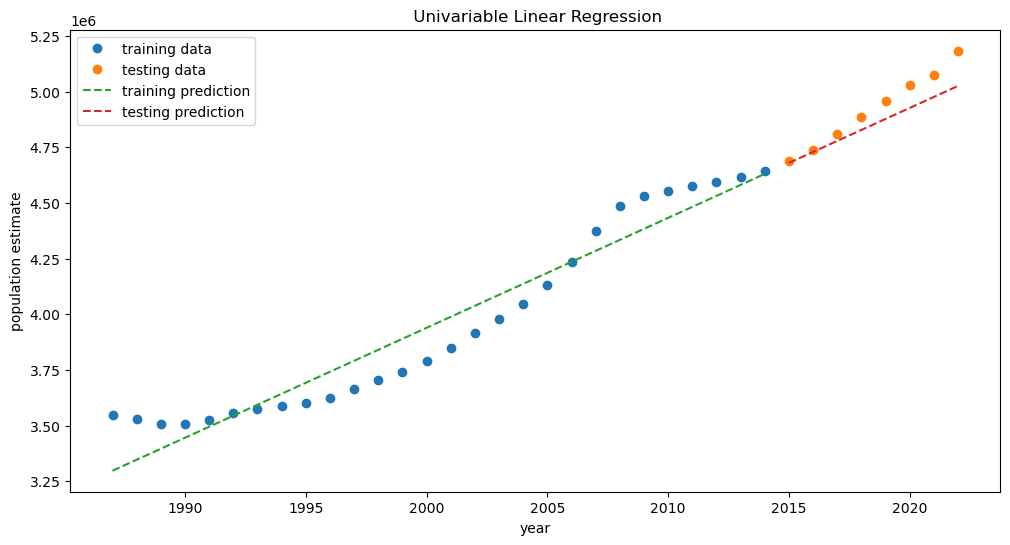

In [392]:
plt.figure(figsize=(12,6))
plt.plot(X_train,y_train,'o', label='training data')
plt.plot(X_test,y_test,'o',label='testing data')
plt.plot(X_train,y_preds_train,'--',label='training prediction')
plt.plot(X_test,y_preds_test,'--',label='testing prediction')
plt.ylabel('population estimate')
plt.xlabel('year')
plt.legend()
plt.title(' Univariable Linear Regression');

### 4.1.2 Multivariable Linear Regression Model

Selecting all independent features from the dataset

In [393]:
X = pop_df.drop(columns =['pop_estimate'],axis=1)
y = pop_df['pop_estimate']

In [394]:
## first using all features
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,shuffle = False)

Defining year variables to be used for plotting purposes

In [395]:
train_year = X_train['year']
test_year = X_test['year']

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples and s is the standard deviation of the training samples.

Note: scaling only needs to be applied when more than one independent variable with varying of orders of magniude are used. Therefore it does not need to be used for univariable linear regression.

In [396]:
#scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [397]:
LR_model_2 = LinearRegression()
LR_model_2.fit(X_train, y_train)

y_preds_train = LR_model_2.predict(X_train)
y_preds_test = LR_model_2.predict(X_test)  #making predictions

In [398]:
## accuracy metrics for regression model: 
r_squared_test_LR_2 = r2_score(y_test,y_preds_test)
r_squared_train_LR_2 = r2_score(y_train,y_preds_train)

rmse_test_LR_2 = rmse(y_test, y_preds_test)
mae_test_LR_2 = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100

print(f'1) the r^2 score for the test set is: {r_squared_test_LR_2}')
print(f'2) the r^2 score for the training set is: {r_squared_train_LR_2}')
print(f'3) the root mean squared error for the test set is: {rmse_test_LR_2}')
print(f'4) the mean absolute error percentage for the test set is: {mae_test_LR_2}')

1) the r^2 score for the test set is: -3.415472315429537
2) the r^2 score for the training set is: 0.9988779963657191
3) the root mean squared error for the test set is: 337822.29485741316
4) the mean absolute error percentage for the test set is: 5.858678910834109


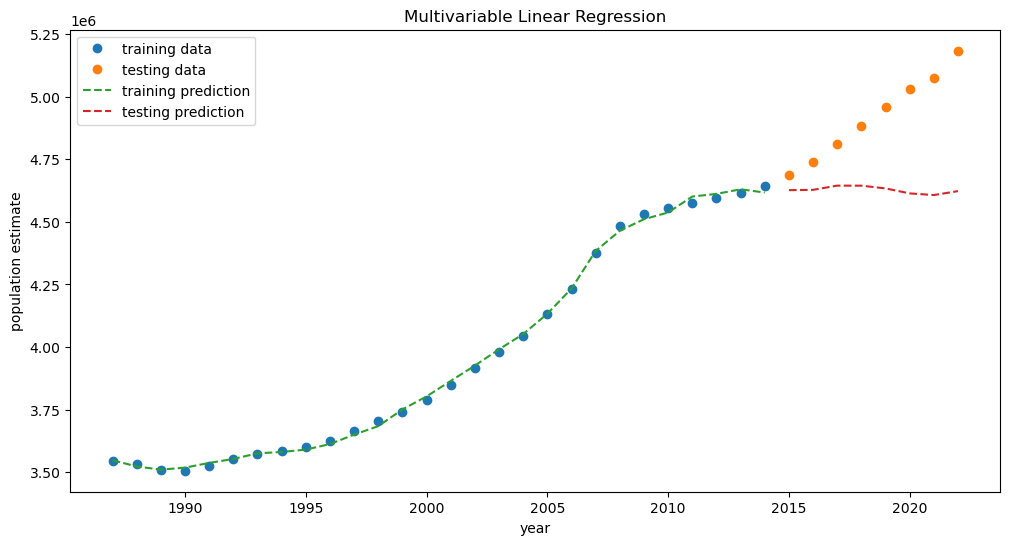

In [399]:
plt.figure(figsize=(12,6))
plt.plot(train_year,y_train,'o', label='training data')
plt.plot(test_year,y_test,'o',label='testing data')
plt.plot(train_year,y_preds_train,'--',label='training prediction')
plt.plot(test_year,y_preds_test,'--',label='testing prediction')
plt.ylabel('population estimate')
plt.xlabel('year')
plt.legend()
plt.title('Multivariable Linear Regression');

### 4.1.3  Feature selection for multivariate linear regression model

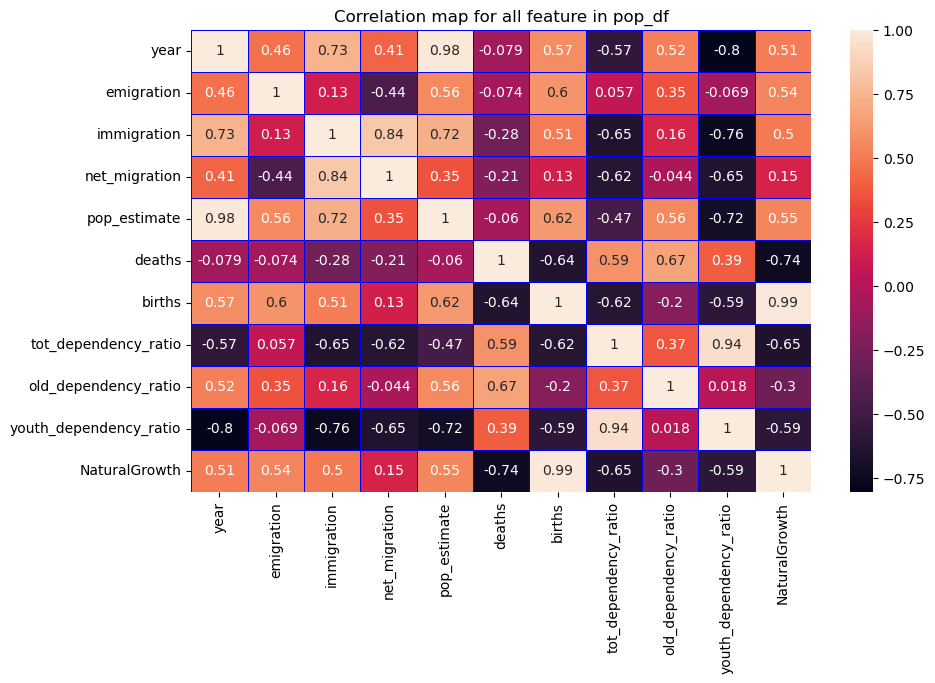

In [400]:
plt.figure(figsize = (10,6))
pop_df_corr= pop_df.corr()
sns.heatmap(pop_df_corr, annot=True, linecolor="blue",lw=0.5)
plt.title('Correlation map for all feature in pop_df');

Need to only take into consideration variables that are somewhat correlated with the target variable (pop_estimate).

Any input feature that doesnt have a correlation >0.5 with the target variable will be removed.

ref: https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

Plotting the correlations between the independent and target variables

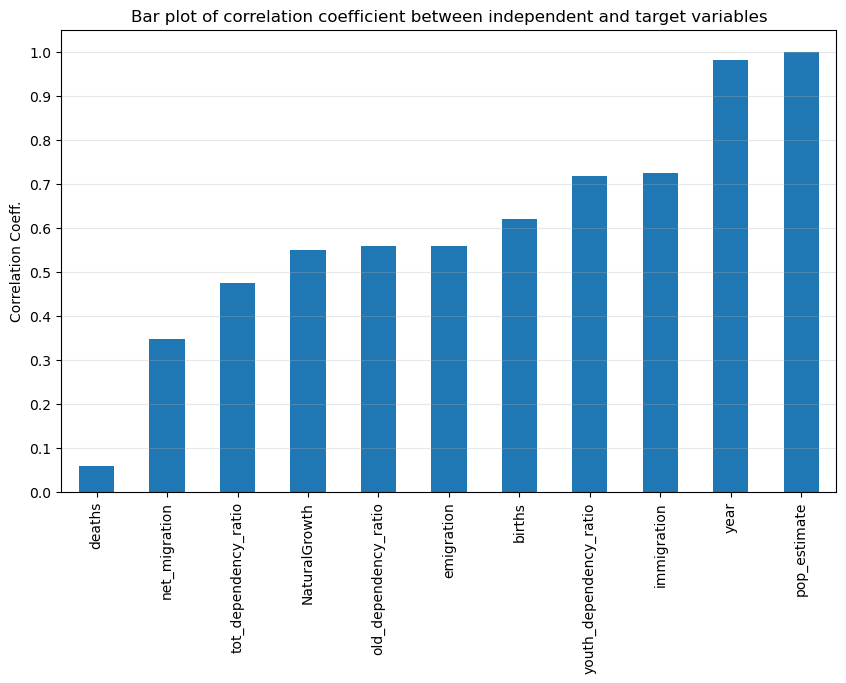

NaturalGrowth             0.548454
old_dependency_ratio      0.558039
emigration                0.559584
births                    0.620068
youth_dependency_ratio    0.717405
immigration               0.724738
year                      0.981800
pop_estimate              1.000000
Name: pop_estimate, dtype: float64


In [401]:
## sorting the correlation values
cor_target = abs(pop_df_corr["pop_estimate"])
cor_target = cor_target.sort_values()


plt.figure(figsize = (10,6))
cor_target.plot(kind='bar')
plt.title('Bar plot of correlation coefficient between independent and target variables')
plt.yticks(np.arange(0,1.1,.1))
plt.grid(True,axis='y',alpha=0.3)
plt.ylabel('Correlation Coeff.')
plt.show()

relevant_features = cor_target[cor_target>0.5]
print(relevant_features)

In [402]:
selected_features = pop_df[relevant_features.index].drop(columns =['pop_estimate'])
selected_features.head()

,NaturalGrowth,old_dependency_ratio,emigration,births,youth_dependency_ratio,immigration,year
0,27645.0,18.107188,40200,58864.0,47.315640,17200,1987
1,22725.0,18.342119,61100,54300.0,46.363764,19200,1988
2,20556.0,18.582250,70600,51659.0,45.520434,26700,1989
3,21136.0,18.593409,56300,52954.0,44.373170,33300,1990
4,21192.0,18.462173,35300,52690.0,43.101315,33300,1991


Another step in feature selection is removing input features that are strongly correlated with each other. To do this we must remove one selected feature in the correlation pair:

In [403]:
feature_correlation = (abs(selected_features.corr().unstack()).sort_values(ascending=False))
feature_correlation = feature_correlation[feature_correlation!=1]
feature_correlation.head(10)

NaturalGrowth           births                    0.988834
births                  NaturalGrowth             0.988834
year                    youth_dependency_ratio    0.803429
youth_dependency_ratio  year                      0.803429
immigration             youth_dependency_ratio    0.756354
youth_dependency_ratio  immigration               0.756354
year                    immigration               0.734522
immigration             year                      0.734522
births                  emigration                0.604676
emigration              births                    0.604676
dtype: float64

A lot of the input features seem to possess a strong correlation between each other, so to ensure there is still enough input features used to train the model, a selected input feature from any input feature pair with a correlation above 0.8 will be removed.

In [404]:
## dropping features
selected_features = selected_features.drop(columns = ['youth_dependency_ratio','NaturalGrowth','old_dependency_ratio','births'])

Running LR model again with reduced features

In [405]:
selected_features.head()

,emigration,immigration,year
0,40200,17200,1987
1,61100,19200,1988
2,70600,26700,1989
3,56300,33300,1990
4,35300,33300,1991


In [406]:
#input features
X = selected_features.copy()
#target feature
y = pop_df['pop_estimate']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,shuffle = False)

In [407]:
train_year = X_train['year']
test_year = X_test['year']

In [408]:
#scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [409]:
LR_model_3 = LinearRegression()
LR_model_3.fit(X_train, y_train)

y_preds_train = LR_model_3.predict(X_train)
y_preds_test = LR_model_3.predict(X_test)

In [410]:
## accuracy metrics for regression model: 
r_squared_test_LR_3 = r2_score(y_test,y_preds_test)
r_squared_train_LR_3 = r2_score(y_train,y_preds_train)

rmse_test_LR_3 = rmse(y_test, y_preds_test)
mae_test_LR_3 = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100

print(f'1) the r^2 score for the test set is: {r_squared_test_LR_3}')
print(f'2) the r^2 score for the training set is: {r_squared_train_LR_3}')
print(f'3) the root mean squared error for the test set is: {rmse_test_LR_3}')
print(f'4) the mean absolute error percentage for the test set is: {mae_test_LR_3}')

1) the r^2 score for the test set is: 0.05703462301608031
2) the r^2 score for the training set is: 0.9771267161817404
3) the root mean squared error for the test set is: 156116.06576468653
4) the mean absolute error percentage for the test set is: 2.596025818245292


Much better accuracy compared to using all features but still way off

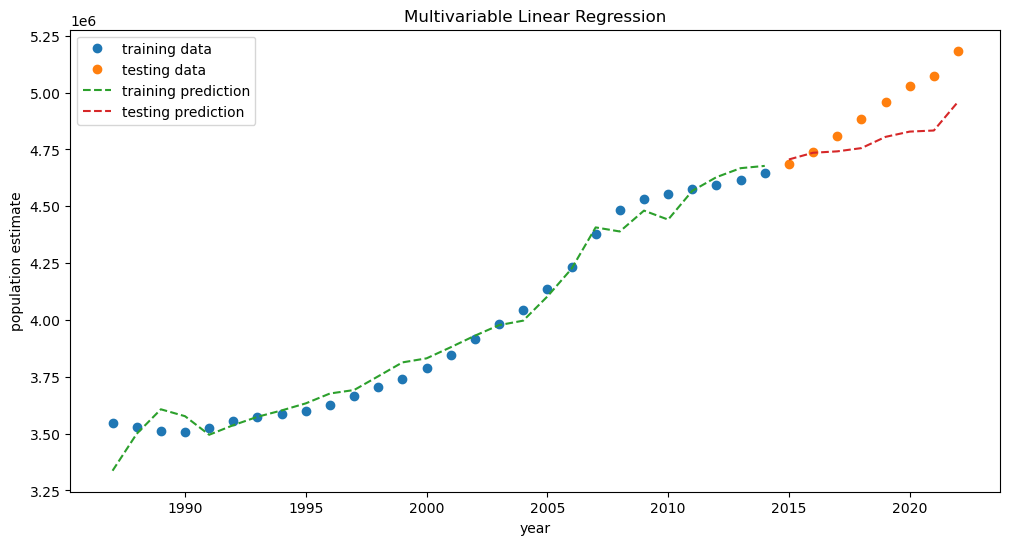

In [411]:
plt.figure(figsize=(12,6))
plt.plot(train_year,y_train,'o', label='training data')
plt.plot(test_year,y_test,'o',label='testing data')
plt.plot(train_year,y_preds_train,'--',label='training prediction')
plt.plot(test_year,y_preds_test,'--',label='testing prediction')
plt.ylabel('population estimate')
plt.xlabel('year')
plt.legend()
plt.title('Multivariable Linear Regression');

In [412]:
feature_imp = pd.Series(LR_model_3.coef_,index=X.columns).sort_values(ascending=False)
feature_imp

year           312688.186023
emigration     113130.414721
immigration     57056.512884
dtype: float64

### 4.1.4 Using Ridge to try correct overfitting:

using GridSearchCV to tune alpha hyperparameter to optimise accuracy

In [413]:
params = {'alpha': [0.01, 0.1, 1,10]}

ridgeregr = GridSearchCV(Ridge(),param_grid=params, verbose=1)

ridgeregr.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1, 10]},
             verbose=1)

In [414]:
ridge = ridgeregr.best_estimator_
ridgeregr.best_params_

{'alpha': 0.1}

Applying ridge regression to the train and test data

In [415]:
y_preds_train = ridge.predict(X_train)
y_preds_test = ridge.predict(X_test)

In [416]:
## accuracy metrics for regression model: 
r_squared_test_ridge= r2_score(y_test,y_preds_test)
r_squared_train_ridge = r2_score(y_train,y_preds_train)

rmse_test_ridge = rmse(y_test, y_preds_test)
mae_test_ridge = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100

print(f'1) the r^2 score for the test set is: {r_squared_test_ridge}')
print(f'2) the r^2 score for the training set is: {r_squared_train_ridge}')
print(f'3) the root mean squared error for the test set is: {rmse_test_ridge}')
print(f'4) the mean absolute error percentage for the test set is: {mae_test_ridge}')

1) the r^2 score for the test set is: 0.024784259954454213
2) the r^2 score for the training set is: 0.977116224731402
3) the root mean squared error for the test set is: 158763.28479710023
4) the mean absolute error percentage for the test set is: 2.6425075147093846


In [417]:
feature_imp = pd.Series(ridge.coef_,index=X.columns).sort_values(ascending=False)
feature_imp

year           310701.028451
emigration     113577.990534
immigration     58117.702688
dtype: float64

### 4.1.5 Using Lasso to try correct for overfitting:

Using GridSearchCV again to tune hyperparameters

In [418]:
params = {'alpha': [0.01, 0.1, 1, 10]}

lassoregr = GridSearchCV(Lasso(),param_grid=params, verbose=1)

lassoregr.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Lasso(), param_grid={'alpha': [0.01, 0.1, 1, 10]},
             verbose=1)

In [419]:
lasso = lassoregr.best_estimator_
lassoregr.best_params_

{'alpha': 10}

In [420]:
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

In [421]:
## accuracy metrics for regression model: 
r_squared_test_lasso= r2_score(y_test,y_preds_test)
r_squared_train_lasso = r2_score(y_train,y_preds_train)

rmse_test_lasso = rmse(y_test, y_preds_test)
mae_test_lasso = np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100

print(f'1) the r^2 score for the test set is: {r_squared_test_lasso}')
print(f'2) the r^2 score for the training set is: {r_squared_train_lasso}')
print(f'3) the root mean squared error for the test set is: {rmse_test_lasso}')
print(f'4) the mean absolute error percentage for the test set is: {mae_test_lasso}')

1) the r^2 score for the test set is: 0.05670600533557102
2) the r^2 score for the training set is: 0.9771267147854726
3) the root mean squared error for the test set is: 156143.26614330092
4) the mean absolute error percentage for the test set is: 2.596496816540283


In [422]:
feature_imp = pd.Series(lasso.coef_,index=X.columns).sort_values(ascending=False)
feature_imp

year           312664.275930
emigration     113137.995109
immigration     57073.003386
dtype: float64

### 4.1.6 Comparing the models:

Using the evaluation metrics calculated for each model and creating a dataframe out of them:

In [423]:
models = np.array(['univariate_LR','multivariate_LR','multivariate_LR_ridge','multivariate_LR_lasso'])
r_squared_test = np.array([r_squared_test_LR_1,r_squared_test_LR_3,r_squared_test_ridge,r_squared_test_lasso])
r_squared_train = np.array([r_squared_train_LR_1,r_squared_train_LR_3,r_squared_train_ridge,r_squared_train_lasso])
rmse_test = np.array([rmse_test_LR_1,rmse_test_LR_3,rmse_test_ridge,rmse_test_lasso])
mae_test = np.array([mae_test_LR_1,mae_test_LR_3,mae_test_ridge,mae_test_lasso])

In [424]:
comparison_metrics = pd.DataFrame({'models':models,
                                  'r_squared_test':r_squared_test,
                                  'r_squared_train':r_squared_train,
                                  'rmse_test':rmse_test,
                                  'mae_test':mae_test})
comparison_metrics

,models,r_squared_test,r_squared_train,rmse_test,mae_test
0,univariate_LR,0.727755,0.925727,83884.066457,1.359899
1,multivariate_LR,0.057035,0.977127,156116.065765,2.596026
2,multivariate_LR_ridge,0.024784,0.977116,158763.284797,2.642508
3,multivariate_LR_lasso,0.056706,0.977127,156143.266143,2.596497


In [483]:
comparison_metrics.to_csv('compMet.csv')

plotting the r2 test and rmse for each regression model

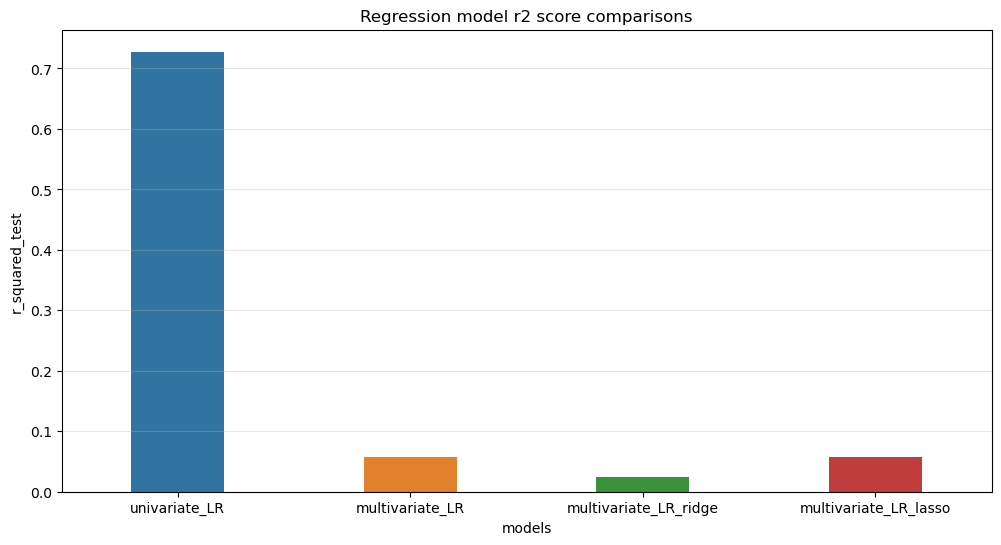

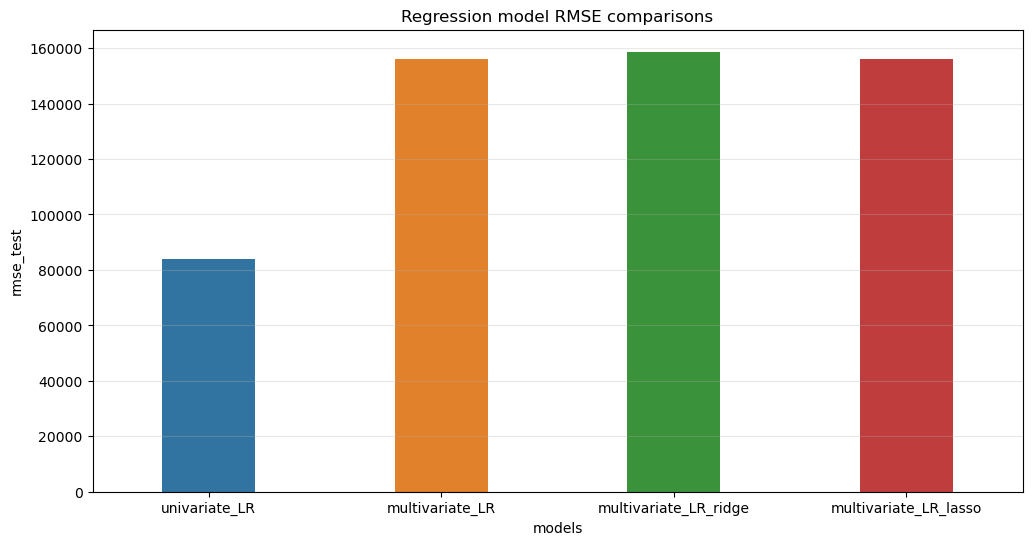

In [425]:
plt.figure(figsize=(12,6))
sns.barplot(x='models',y='r_squared_test',data=comparison_metrics,width=.4)
plt.grid(axis='y',alpha=.3)
plt.title('Regression model r2 score comparisons')
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(x='models',y='rmse_test',data=comparison_metrics,width=.4)
plt.grid(axis='y',alpha=.3)
plt.title('Regression model RMSE comparisons')
plt.show()


## 4.1.7 Forecasting

Using univariable regression for all years:

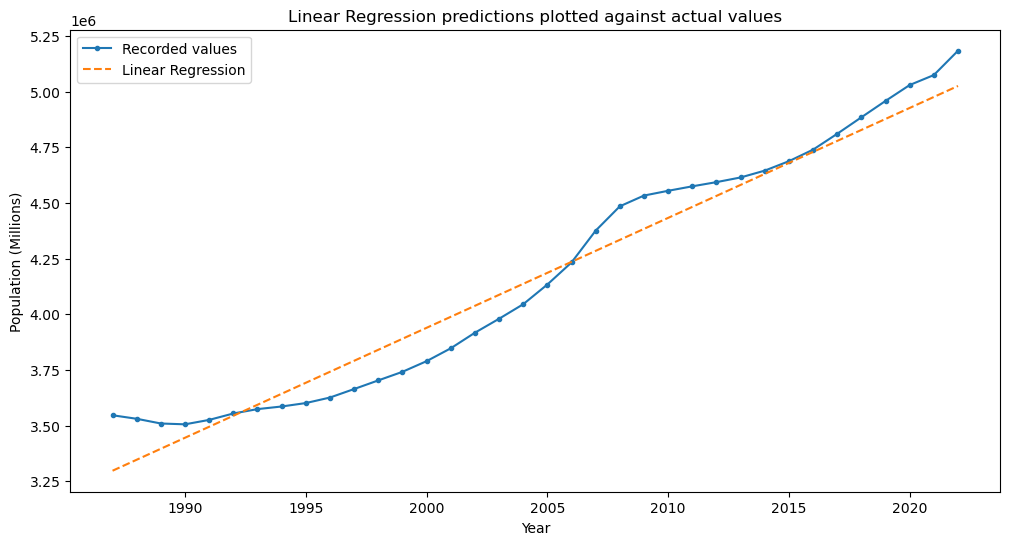

In [428]:
##univariate linear regression, using year and population
X = pop_df['year'].values.reshape(-1,1)
y = pop_df['pop_estimate'].values

## predicting for entire dataset
model_predictions = LR_model_1.predict(X)
predictions = pd.DataFrame({'year':np.array(pop_df['year']),'predicted_population':model_predictions})


plt.figure(figsize=(12,6))
plt.plot(predictions['year'],y,'.-',label='Recorded values')
plt.plot(predictions['year'],predictions['predicted_population'],'--',label='Linear Regression')
plt.xlabel('Year')
plt.ylabel('Population (Millions)')
plt.title('Linear Regression predictions plotted against actual values')
#plt.grid(True,alpha=0.3)
plt.legend()

Using the univariable linear regression to determine the population for the next 10 years. 

In [431]:
#selecting input and target variables
X = pop_df['year'].values.reshape(-1,1)
y = pop_df['pop_estimate'].values

##defining the model
lrm_features = LinearRegression()
lrm_features.fit(X, y)

#defining year range
years =  np.arange(2023,2034).reshape(-1,1) 

#predicting the populations for the next 10 years
model_predictions = lrm_features.predict(years)

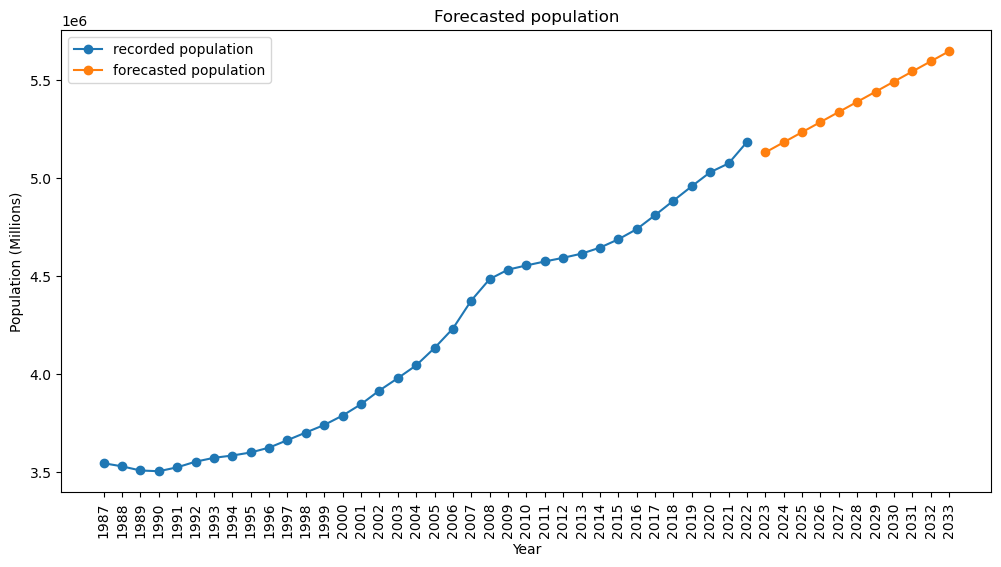

In [432]:
plt.figure(figsize=(12,6))
plt.plot(pop_df['year'],pop_df['pop_estimate'],'o-',label='recorded population')
plt.plot(years,model_predictions,'o-',label='forecasted population')
plt.xlabel('Year')
plt.xticks(np.arange(1987,2034,1),rotation=90)
plt.ylabel('Population (Millions)')
plt.title('Forecasted population')
#plt.grid(True,alpha=0.3)
plt.legend();

### Forecasting the old age dependency

For forecasting the old age dependency, values from after 2008 are used to train the model as this assumes a linear relationship to the year variable. ratios before 2008 result in a poor linear regression model for the data

In [435]:
#querying for after 2008
pop_df_new = pop_df.query('year > 2008')

In [436]:
## applying linear regression to the last 15 years in the data (i.e to the linear part of the data)
X = pop_df_new['year'].values.reshape(-1,1)
y = pop_df_new['old_dependency_ratio'].values
lrm_features = LinearRegression()
lrm_features.fit(X, y)
years =  np.arange(2023,2034).reshape(-1,1) 
model_predictions = lrm_features.predict(years)

In [437]:
years = np.arange(2023,2034).reshape(-1,1) 
predicted_features['year']=years

Plotting the forecast model

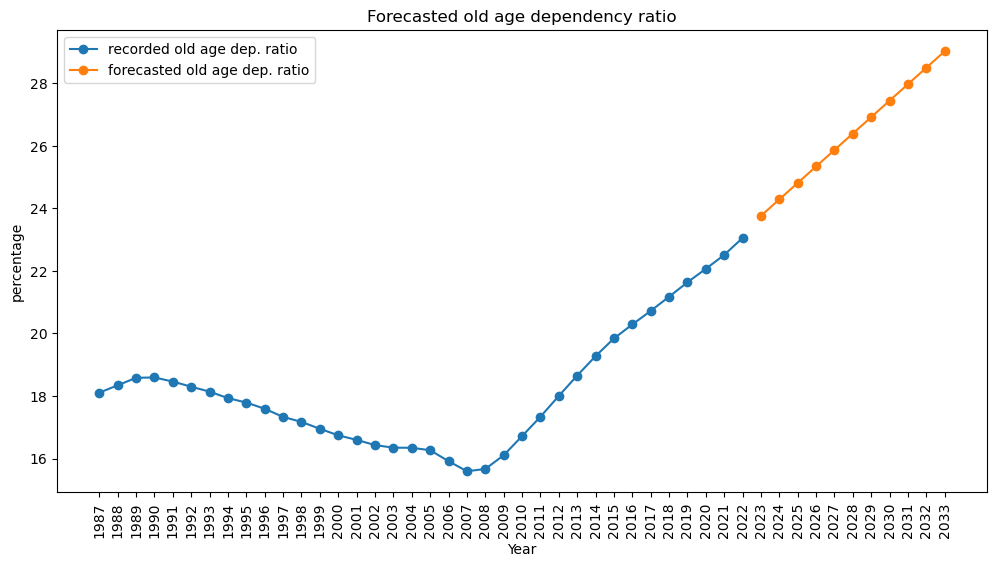

In [439]:
plt.figure(figsize=(12,6))
plt.plot(pop_df['year'],pop_df['old_dependency_ratio'],'o-',label='recorded old age dep. ratio')
plt.plot(years,model_predictions,'o-',label='forecasted old age dep. ratio')
plt.xlabel('Year')
plt.ylabel('percentage')
plt.title('Forecasted old age dependency ratio')
plt.xticks(np.arange(1987,2034,1),rotation=90)
#plt.grid(True,alpha=0.3)
plt.legend()

In [440]:
model_predictions

array([23.76450358, 24.29127862, 24.81805365, 25.34482869, 25.87160372,
       26.39837876, 26.92515379, 27.45192882, 27.97870386, 28.50547889,
       29.03225393])

### Forecasting young age dependency ratio

In [442]:
X = pop_df_new['year'].values.reshape(-1,1)
y = pop_df_new['youth_dependency_ratio'].values
lrm_features = LinearRegression()
lrm_features.fit(X, y)
years =  np.arange(2023,2034).reshape(-1,1) 
model_predictions = lrm_features.predict(years)

In [443]:
years = np.arange(2023,2034).reshape(-1,1) 
predicted_features['year']=years

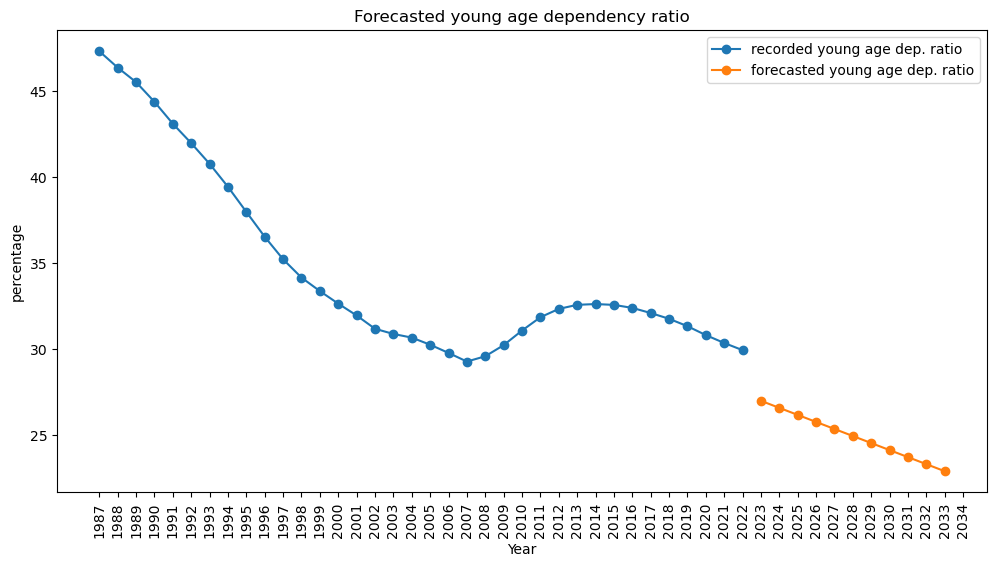

In [444]:
## plotting
plt.figure(figsize=(12,6))
plt.plot(pop_df['year'],pop_df['youth_dependency_ratio'],'o-',label='recorded young age dep. ratio')
plt.plot(predicted_features['year'],predicted_features['youth_dependency_ratio'],'o-',label='forecasted young age dep. ratio')
plt.xlabel('Year')
plt.ylabel('percentage')
plt.title('Forecasted young age dependency ratio')
#plt.grid(True,alpha=0.3)
plt.xticks(np.arange(1987,2035,1),rotation=90)
plt.legend()

In [445]:
predicted_features

,emigration,immigration,net_migration,pop_estimate,deaths,births,tot_dependency_ratio,old_dependency_ratio,youth_dependency_ratio,NaturalGrowth,year
0,63086.825397,102632.222222,39520.158730,5.130901e+06,30060.912698,68347.869841,47.057465,20.068801,26.988664,38286.957143,2023
1,63900.827971,104758.888889,40831.909052,5.182477e+06,30047.278850,68794.868812,46.747118,20.167756,26.579363,38747.589961,2024
2,64714.830545,106885.555556,42143.659374,5.234053e+06,30033.645002,69241.867782,46.436772,20.266711,26.170061,39208.222780,2025
3,65528.833119,109012.222222,43455.409695,5.285629e+06,30020.011154,69688.866752,46.126425,20.365665,25.760760,39668.855598,2026
4,66342.835693,111138.888889,44767.160017,5.337205e+06,30006.377306,70135.865723,45.816078,20.464620,25.351458,40129.488417,2027
5,67156.838267,113265.555556,46078.910339,5.388781e+06,29992.743458,70582.864693,45.505731,20.563575,24.942156,40590.121236,2028
6,67970.840841,115392.222222,47390.660661,5.440357e+06,29979.109610,71029.863664,45.195384,20.662530,24.532855,41050.754054,2029
7,68784.843415,117518.888889,48702.410982,5.491933e+06,29965.475761,71476.862634,44.885038,20.761485,24.123553,41511.386873,2030
8,69598.845989,119645.555556,50014.161304,5.543508e+06,29951.841913,71923.861604,44.574691,20.860439,23.714251,41972.019691,2031
9,70412.848563,121772.222222,51325.911626,5.595084e+06,29938.208065,72370.860575,44.264344,20.959394,23.304950,42432.652510,2032


# 4.2 Classification Models

creating a new feature "pop_change_comp" which indicates the dominant component in population change for each row of data.

i.e it is set to "Natural" if net_migration < NaturalGrowth and "Migration" if net_migration > NaturalGrowth

In [446]:
## Creating population change component category
for i,row in pop_df.iterrows():
    if row['net_migration'] > row['NaturalGrowth']:
        pop_df.at[i,'pop_change_comp'] = 'Migration'
    elif row['net_migration'] < row['NaturalGrowth']:
        pop_df.at[i,'pop_change_comp'] = 'Natural'

In [447]:
pop_df.head()

,year,emigration,immigration,net_migration,pop_estimate,deaths,births,tot_dependency_ratio,old_dependency_ratio,youth_dependency_ratio,NaturalGrowth,pop_change_comp
0,1987,40200,17200,-23000,3546500,31219,58864.0,65.422828,18.107188,47.315640,27645.0,Natural
1,1988,61100,19200,-41900,3530700,31575,54300.0,64.705882,18.342119,46.363764,22725.0,Natural
2,1989,70600,26700,-43900,3509500,31103,51659.0,64.102684,18.582250,45.520434,20556.0,Natural
3,1990,56300,33300,-22900,3505800,31818,52954.0,62.966578,18.593409,44.373170,21136.0,Natural
4,1991,35300,33300,-2000,3525700,31498,52690.0,61.563488,18.462173,43.101315,21192.0,Natural


Visualising the frequency of each class

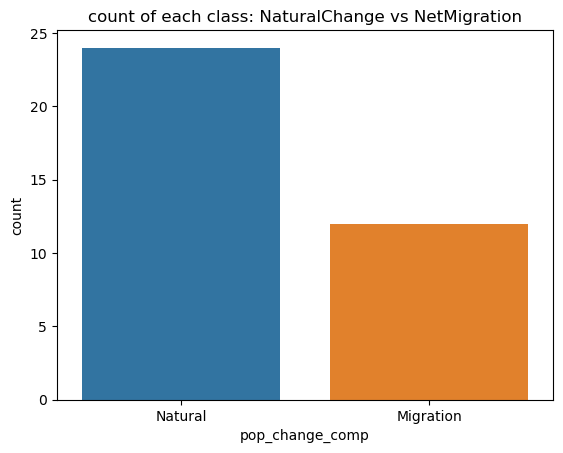

In [449]:
sns.countplot(x='pop_change_comp',data = pop_df)
plt.title('count of each class: NaturalChange vs NetMigration');

Using label encoder to transform the categorical values into numerical values to optimise how the machine learning model operates on the data. Label encoder is used here as it is 1 dimensional data

In [450]:
labelencoder = LabelEncoder()
pop_df['pop_change_comp'] = labelencoder.fit_transform(pop_df['pop_change_comp'])

In [451]:
pop_df.head()

,year,emigration,immigration,net_migration,pop_estimate,deaths,births,tot_dependency_ratio,old_dependency_ratio,youth_dependency_ratio,NaturalGrowth,pop_change_comp
0,1987,40200,17200,-23000,3546500,31219,58864.0,65.422828,18.107188,47.315640,27645.0,1
1,1988,61100,19200,-41900,3530700,31575,54300.0,64.705882,18.342119,46.363764,22725.0,1
2,1989,70600,26700,-43900,3509500,31103,51659.0,64.102684,18.582250,45.520434,20556.0,1
3,1990,56300,33300,-22900,3505800,31818,52954.0,62.966578,18.593409,44.373170,21136.0,1
4,1991,35300,33300,-2000,3525700,31498,52690.0,61.563488,18.462173,43.101315,21192.0,1


In [452]:
pop_df.corr()['pop_change_comp']

year                     -0.402734
emigration                0.222525
immigration              -0.720636
net_migration            -0.775619
pop_estimate             -0.381026
deaths                    0.134528
births                   -0.143540
tot_dependency_ratio      0.426545
old_dependency_ratio     -0.089554
youth_dependency_ratio    0.491637
NaturalGrowth            -0.150280
pop_change_comp           1.000000
Name: pop_change_comp, dtype: float64

analysing features that are strongly correlated with other independent features from the dataset

In [453]:
features = pop_df.drop(columns=['pop_change_comp'])
feature_correlation = (abs(features.corr().unstack()).sort_values(ascending=False))
feature_correlation = feature_correlation[feature_correlation!=1]
feature_correlation.head(20)

NaturalGrowth           births                    0.988834
births                  NaturalGrowth             0.988834
year                    pop_estimate              0.981800
pop_estimate            year                      0.981800
youth_dependency_ratio  tot_dependency_ratio      0.937309
tot_dependency_ratio    youth_dependency_ratio    0.937309
immigration             net_migration             0.836447
net_migration           immigration               0.836447
year                    youth_dependency_ratio    0.803429
youth_dependency_ratio  year                      0.803429
                        immigration               0.756354
immigration             youth_dependency_ratio    0.756354
NaturalGrowth           deaths                    0.744209
deaths                  NaturalGrowth             0.744209
year                    immigration               0.734522
immigration             year                      0.734522
pop_estimate            immigration               0.7247

removing selected features from any feature pair that posseses a strong correlation with another feature

In [485]:
features = pop_df.drop(columns=['youth_dependency_ratio','pop_change_comp','year','NaturalGrowth','tot_dependency_ratio','net_migration'])
feature_correlation = (abs(features.corr().unstack()).sort_values(ascending=False))

Defining input and target variables for each classification model: 

In [486]:
X = features
y = pop_df['pop_change_comp']

#defining empty dataframe for appending accuracy of each model
classification_accuracy = pd.DataFrame(columns = ['model','accuracy','precision','recall','f1_score'])

### 4.2.1 <u> Logistic Regression Classification Model: <u>

In [456]:
# in the case of classification models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#scaling the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [457]:
y_pred = logreg.predict(X_test_scaled)

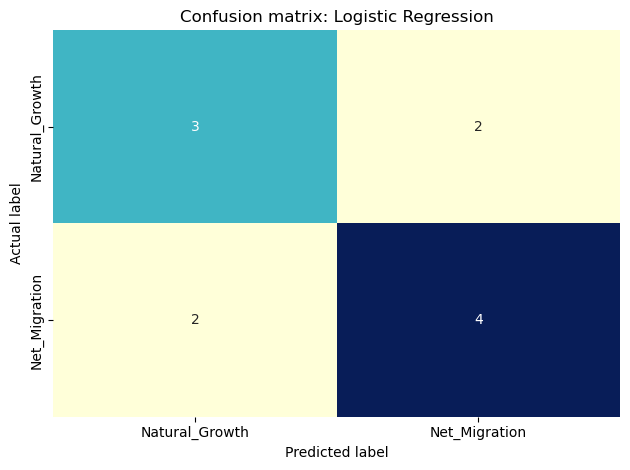

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.67      0.67      0.67         6

    accuracy                           0.64        11
   macro avg       0.63      0.63      0.63        11
weighted avg       0.64      0.64      0.64        11



In [458]:
confusion = metrics.confusion_matrix(y_test, y_pred)

class_names=["Natural_Growth","Net_Migration"] 
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g',xticklabels=class_names,yticklabels=class_names, cbar=False)
plt.title('Confusion matrix: Logistic Regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show() 

print(classification_report(y_test,y_pred))

In [459]:
accuracy_LR = metrics.accuracy_score(y_test, y_pred)
precision_LR = metrics.precision_score(y_test, y_pred)
recall_LR = metrics.recall_score(y_test, y_pred)
f1_score_LR = metrics.f1_score(y_test, y_pred)

classification_accuracy = classification_accuracy.append({'model' : 'LogisticRegression',
                                                          'accuracy' : accuracy_LR,
                                                          'precision' : precision_LR,
                                                          'recall': recall_LR,
                                                          'f1_score':f1_score_LR}, ignore_index = True)

In [460]:
print("Accuracy of logistic regression model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of logistic regression model: 0.6363636363636364


### 4.2.2 <u> K-Nearest Neighbour (KNN) classification model: </u>

In [461]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#feature scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [462]:
##default number of neighbours is 5
knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

train_accuracy = knn.score(X_train_scaled, y_train)
test_accuracy = knn.score(X_test_scaled, y_test)

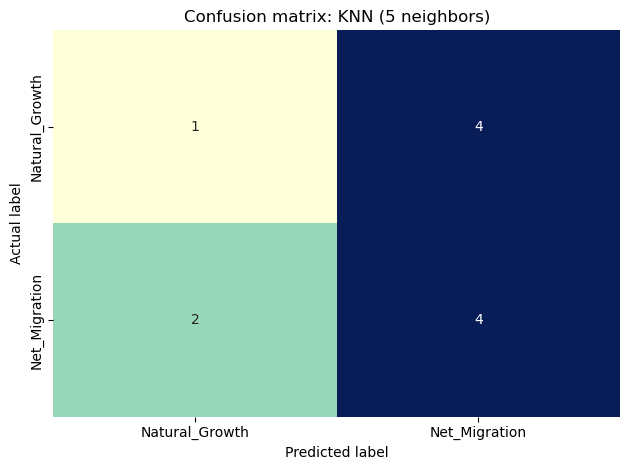

              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       0.50      0.67      0.57         6

    accuracy                           0.45        11
   macro avg       0.42      0.43      0.41        11
weighted avg       0.42      0.45      0.43        11



In [463]:
y_pred = knn.predict(X_test_scaled)

confusion_knn = metrics.confusion_matrix(y_test, y_pred)

class_names=["Natural_Growth","Net_Migration"] 
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(confusion_knn), annot=True, cmap="YlGnBu" ,fmt='g',
            xticklabels=class_names,yticklabels=class_names,cbar=False)
plt.title('Confusion matrix: KNN (5 neighbors)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show() 

print(classification_report(y_test,y_pred))

In [464]:
print("Accuracy of KNN (5 neighboars) model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of KNN (5 neighboars) model: 0.45454545454545453


In [465]:
accuracy_knn5 = metrics.accuracy_score(y_test, y_pred)
precision_knn5 = metrics.precision_score(y_test, y_pred)
recall_knn5 = metrics.recall_score(y_test, y_pred)
f1_score_knn5 = metrics.f1_score(y_test, y_pred)

classification_accuracy = classification_accuracy.append({'model' : 'KNN (5 neighbors)',
                                                          'accuracy' : accuracy_knn5,
                                                          'precision' : precision_knn5,
                                                          'recall': recall_knn5,
                                                          'f1_score':f1_score_knn5}, ignore_index = True)

### 4.2.3 <u> K-Nearest Neighbour (KNN) tuning hyperparameter k </u>

Tuning k is very important as a small value of k can lead to overfitting, while too large a value can result in underfitting. Both cases lead to a reduction in the model accuracy.

In [466]:
neighbors = np.arange(1, 10)                 
train_accuracy = np.zeros(len(neighbors))   
test_accuracy = np.zeros(len(neighbors)) 

for i,k in enumerate(neighbors):                          
    knn = KNeighborsClassifier(n_neighbors = k)         

    knn.fit(X_train_scaled, y_train)                    

    train_accuracy[i] = knn.score(X_train_scaled, y_train) 

    test_accuracy[i] =  knn.score(X_test_scaled, y_test)

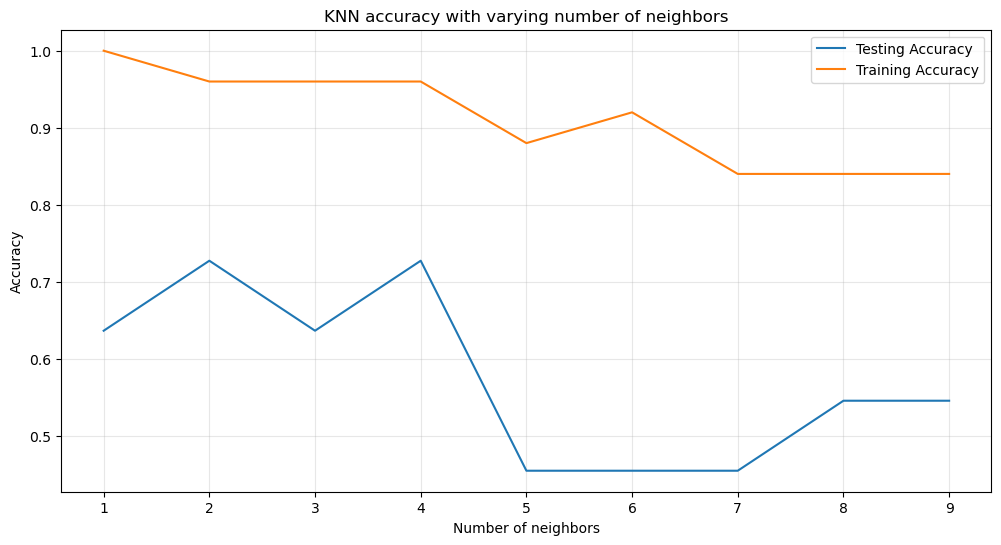

In [467]:
plt.figure(figsize = (12, 6))
plt.title('KNN accuracy with varying number of neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid(True,alpha=0.3)
plt.show()

In [474]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(1, 10, 1)}

In [475]:
knn = KNeighborsClassifier()
cv_knn=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
cv_knn.fit(X_train_scaled, y_train)
print(cv_knn.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'n_neighbors': 2}


In [476]:
#optimizing with 2 neighbors
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_scaled, y_train)
train_accuracy = knn.score(X_train_scaled, y_train)
test_accuracy = knn.score(X_test_scaled, y_test)

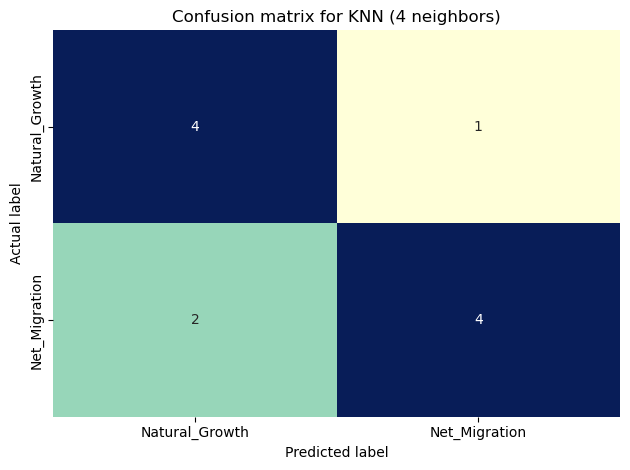

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.80      0.67      0.73         6

    accuracy                           0.73        11
   macro avg       0.73      0.73      0.73        11
weighted avg       0.74      0.73      0.73        11



In [477]:
y_pred = knn.predict(X_test_scaled)
confusion_knn = metrics.confusion_matrix(y_test, y_pred)

class_names=["Natural_Growth","Net_Migration"] 
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(confusion_knn), annot=True, cmap="YlGnBu" ,fmt='g',xticklabels=class_names,yticklabels=class_names,cbar=False)
plt.title('Confusion matrix for KNN (4 neighbors)')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

print(classification_report(y_test,y_pred))

In [478]:
accuracy_knn_tuned = metrics.accuracy_score(y_test, y_pred)
precision_knn_tuned  = metrics.precision_score(y_test, y_pred)
recall_knn_tuned  = metrics.recall_score(y_test, y_pred)
f1_score_knn_tuned  = metrics.f1_score(y_test, y_pred)

classification_accuracy = classification_accuracy.append({'model' : 'KNN (2 neighbors)',
                                                          'accuracy' : accuracy_knn_tuned,
                                                          'precision' : precision_knn_tuned,
                                                          'recall': recall_knn_tuned,
                                                          'f1_score':f1_score_knn_tuned}, ignore_index = True)

In [479]:
print("Accuracy of KNN (4 neighboars) model:",metrics.accuracy_score(y_test, y_pred))

Accuracy of KNN (4 neighboars) model: 0.7272727272727273


## Classification Model Comparisons:

In [480]:
classification_accuracy

,model,accuracy,precision,recall,f1_score
0,LogisticRegression,0.636364,0.666667,0.666667,0.666667
1,KNN (5 neighbors),0.454545,0.500000,0.666667,0.571429
2,KNN (2 neighbors),0.727273,0.800000,0.666667,0.727273


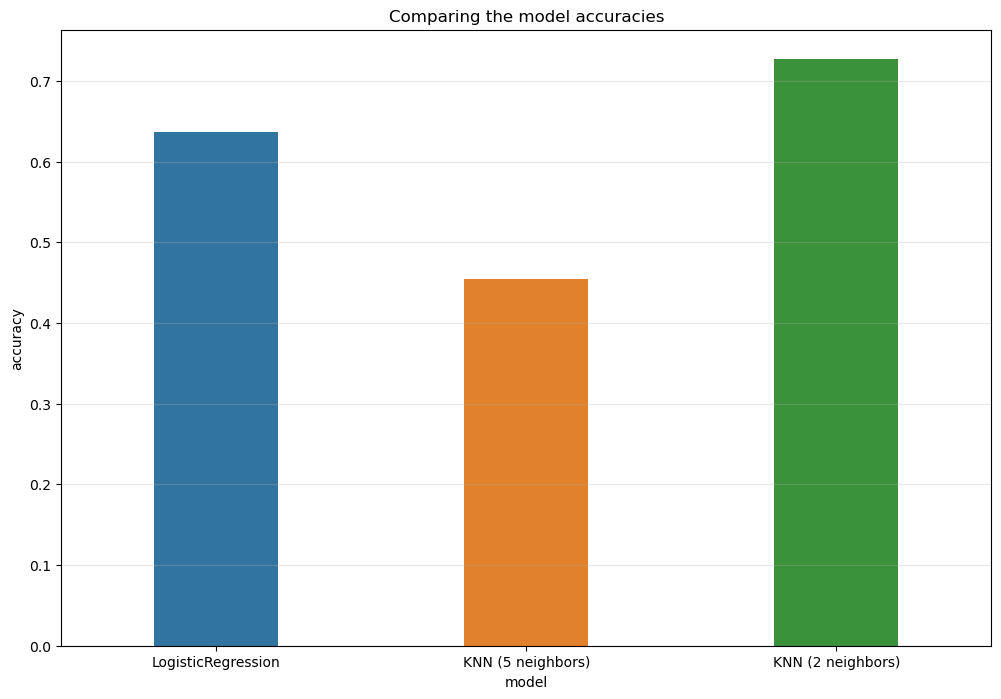

In [481]:
plt.figure(figsize=(12,8))
plt.title('Comparing the model accuracies')
sns.barplot(x='model',y='accuracy',data=classification_accuracy,width = 0.4)
plt.grid(axis='y',alpha=0.3)